# Cluster model (K-means)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Preprocessing-the-data" data-toc-modified-id="Preprocessing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocessing the data</a></span><ul class="toc-item"><li><span><a href="#Dropping-duplicate-index-column" data-toc-modified-id="Dropping-duplicate-index-column-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dropping duplicate index column</a></span></li><li><span><a href="#Reducing-number-of-items-in-brand-column" data-toc-modified-id="Reducing-number-of-items-in-brand-column-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reducing number of items in brand column</a></span></li><li><span><a href="#Get-dummies-for-brand-column" data-toc-modified-id="Get-dummies-for-brand-column-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Get dummies for brand column</a></span></li><li><span><a href="#New-dataframe-(numerical-columns-only)" data-toc-modified-id="New-dataframe-(numerical-columns-only)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>New dataframe (numerical columns only)</a></span></li><li><span><a href="#Dealing-with-null-values" data-toc-modified-id="Dealing-with-null-values-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dealing with null values</a></span></li><li><span><a href="#Scaling-the-data" data-toc-modified-id="Scaling-the-data-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Scaling the data</a></span></li></ul></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model building</a></span><ul class="toc-item"><li><span><a href="#First-run-(k=3)" data-toc-modified-id="First-run-(k=3)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>First run (k=3)</a></span></li><li><span><a href="#Chosing-the-best-k" data-toc-modified-id="Chosing-the-best-k-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Chosing the best k</a></span></li><li><span><a href="#Silhouette-score" data-toc-modified-id="Silhouette-score-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Silhouette score</a></span></li><li><span><a href="#Final-model-(k=8)" data-toc-modified-id="Final-model-(k=8)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Final model (k=8)</a></span></li></ul></li></ul></div>

## Libraries

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

c:\users\katha\appdata\local\programs\python\python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Importing the data

In [2]:
df = pd.read_csv('final_df.csv')

In [3]:
df.shape

(1232, 16)

In [4]:
df.head()

,Unnamed: 0,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link
0,0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,27.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/f1/50/81/C...
1,1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,7.0,https://www.korodrogerie.de/schokodrops-mit-xy...,https://koro2.imgix.net/media/image/2c/01/f8/S...
2,2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,36.0,https://www.korodrogerie.de/schoko-protein-cru...,https://koro2.imgix.net/media/image/30/78/62/P...
3,3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,32.0,https://www.korodrogerie.de/soja-protein-crisp...,https://koro2.imgix.net/media/image/84/55/ca/C...
4,4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,10.0,https://www.korodrogerie.de/bohnen-erbsen-mix-...,https://koro2.imgix.net/media/image/a9/37/79/B...


## Preprocessing the data

### Dropping duplicate index column

In [5]:
df = df.drop('Unnamed: 0', axis=1)

### Including price/weight column

In [6]:
df['price_weight'] = df['price'] / df['weight']

### Reducing number of items in brand column

In [7]:
pd.set_option('display.max_rows', 20)

In [8]:
brand_count = pd.DataFrame(df['brand'].value_counts()).reset_index()
brand_count

,index,brand
0,Koro,221
1,Foodist,96
2,mind sweets,40
3,Plamil,30
4,Heimatgut,29
...,...,...
99,Lord of Tofu,1
100,Céliane,1
101,Liebhart's,1
102,veggyness,1


In [9]:
keep_brands = brand_count['index'][brand_count['brand']>10].to_list()

In [10]:
len(keep_brands)

34

In [11]:
def clean_brand(col, lst_brands=[]):
    
    brand_new = []
    
    for p in col:
        if p not in lst_brands:
            brand_new.append('Other')
        else:
            brand_new.append(p)
    
    return brand_new

In [12]:
df['brand_new'] = clean_brand(df['brand'], lst_brands=keep_brands)
df['brand_new'].value_counts()

Other                  338
Koro                   221
Foodist                 96
mind sweets             40
Plamil                  30
                      ... 
PURmacherei             12
Vitaina Italia          12
N.A! Nature Addicts     12
Vantastic Foods         11
rosmarin BIOBACK        11
Name: brand_new, Length: 35, dtype: int64

### Get dummies for brand column

In [13]:
df_new = pd.get_dummies(df, columns=['brand_new'])
df_new.head()

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,...,brand_new_Vitaina Italia,brand_new_Vivani,brand_new_Wally & Whiz,brand_new_Zebra,brand_new_Zotter,brand_new_go4raw,brand_new_le pain des fleurs,brand_new_mind sweets,brand_new_rosmarin BIOBACK,brand_new_ÖKOVITAL
0,Soja Protein Crispies 58 % mit Kakao,Koro,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,...,0,0,0,0,0,0,0,0,0,0
1,Schokodrops mit Xylit,Koro,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,...,0,0,0,0,0,0,0,0,0,0
2,Schoko Protein Crunchies ohne Zuckerzusatz,Koro,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,...,0,0,0,0,0,0,0,0,0,0
3,Soja Protein Crispies 60 %,Koro,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,...,0,0,0,0,0,0,0,0,0,0
4,Bohnen-Erbsen-Mix geröstet & gesalzen,Koro,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,...,0,0,0,0,0,0,0,0,0,0


### New dataframe (numerical columns only)

In [14]:
df_model = df_new.select_dtypes(np.number)

In [15]:
df_model.head()

,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,...,brand_new_Vitaina Italia,brand_new_Vivani,brand_new_Wally & Whiz,brand_new_Zebra,brand_new_Zotter,brand_new_go4raw,brand_new_le pain des fleurs,brand_new_mind sweets,brand_new_rosmarin BIOBACK,brand_new_ÖKOVITAL
0,14.0,1.0,1535.0,362.0,19.0,4.0,282.0,91.0,18.0,58.0,...,0,0,0,0,0,0,0,0,0,0
1,21.0,1.0,2290.0,555.0,46.0,28.0,31.0,10.0,10.0,92.0,...,0,0,0,0,0,0,0,0,0,0
2,20.0,1.0,1875.0,448.0,28.0,12.0,37.0,14.0,83.0,21.0,...,0,0,0,0,0,0,0,0,0,0
3,13.0,1.0,1541.0,363.0,18.0,2.0,26.0,8.0,8.0,60.0,...,0,0,0,0,0,0,0,0,0,0
4,11.5,1.0,1766.0,421.0,14.0,23.0,35.0,67.0,10.0,33.0,...,0,0,0,0,0,0,0,0,0,0


### Dropping unnecessary columns

In [16]:
drop = ['price', 'weight', 'kj']
df_model = df_model.drop(drop, axis=1)
df_model.columns

Index(['kcal', 'fat', 'sat_fat', 'carbs', 'sugar', 'fibre', 'protein', 'salt',
       'price_weight', 'brand_new_Banabar', 'brand_new_Bernsteinzimmer',
       'brand_new_Birkengold', 'brand_new_Candy Tree', 'brand_new_Dörrwerk',
       'brand_new_Foodist', 'brand_new_Green & More', 'brand_new_Heimatgut',
       'brand_new_Koro', 'brand_new_Landgarten', 'brand_new_Lini's Bites',
       'brand_new_Lovechock', 'brand_new_Lubs', 'brand_new_MYLKCHOCY',
       'brand_new_Moo Free', 'brand_new_N.A! Nature Addicts',
       'brand_new_Naturata', 'brand_new_Not Guilty', 'brand_new_Other',
       'brand_new_PURmacherei', 'brand_new_Plamil', 'brand_new_Rapunzel',
       'brand_new_Roo'bar Riegel', 'brand_new_Taste of Nature',
       'brand_new_Vantastic Foods', 'brand_new_Vitaina Italia',
       'brand_new_Vivani', 'brand_new_Wally & Whiz', 'brand_new_Zebra',
       'brand_new_Zotter', 'brand_new_go4raw', 'brand_new_le pain des fleurs',
       'brand_new_mind sweets', 'brand_new_rosmarin BIOBACK',

### Dealing with null values

In [17]:
df_model.isna().sum().sort_values(ascending=False)

fibre                     707
salt                       83
protein                    15
sat_fat                    13
fat                        13
                         ... 
brand_new_Lini's Bites      0
brand_new_Lovechock         0
brand_new_Lubs              0
brand_new_Moo Free          0
brand_new_ÖKOVITAL          0
Length: 44, dtype: int64

In [18]:
def per_NaN_columns(df):
    nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage_nulls'])
    nulls = nulls.sort_values('percentage_nulls', ascending = False)
    return nulls

In [19]:
nulls = per_NaN_columns(df_model)
nulls

,percentage_nulls
fibre,57.386364
salt,6.737013
protein,1.217532
sat_fat,1.055195
fat,1.055195
...,...
brand_new_Lini's Bites,0.000000
brand_new_Lovechock,0.000000
brand_new_Lubs,0.000000
brand_new_Moo Free,0.000000


**Conclusion:**
- the percentage of null-values for fibre is too high = column will be dropped
- all other null-values will be replaced by the mean of the column

In [20]:
def fill_NaN(df):
    for col in df:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)    
    return df

In [21]:
df_model = fill_NaN(df_model)

In [22]:
df_model.isna().sum().sort_values(ascending=False)

kcal                             0
fat                              0
brand_new_N.A! Nature Addicts    0
brand_new_Naturata               0
brand_new_Not Guilty             0
                                ..
brand_new_Heimatgut              0
brand_new_Koro                   0
brand_new_Landgarten             0
brand_new_Lini's Bites           0
brand_new_ÖKOVITAL               0
Length: 44, dtype: int64

### Dealing with outliers

In [23]:
def showing_dist_box(df):
   
    for col in df.columns:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        # sns.set_style("darkgrid")

        sns.distplot(df[col], ax=axes[0])
        sns.boxplot(df[col], ax=axes[1])
        
        plt.show()

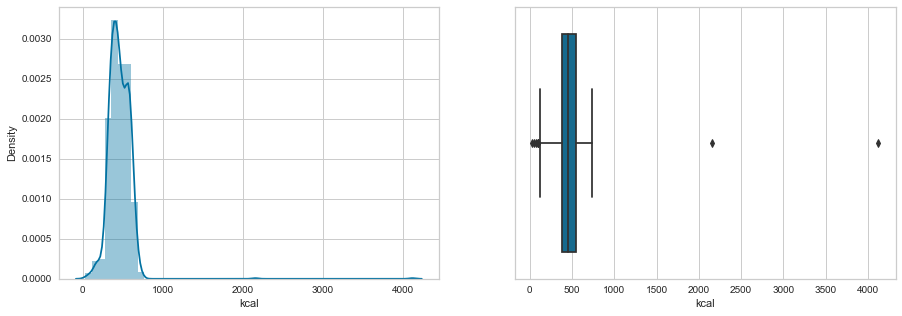

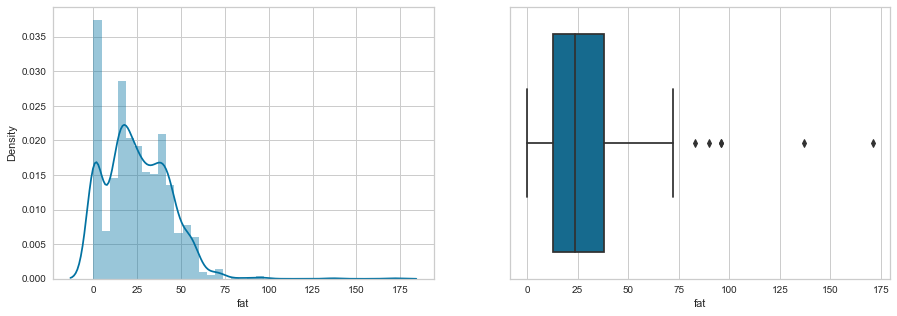

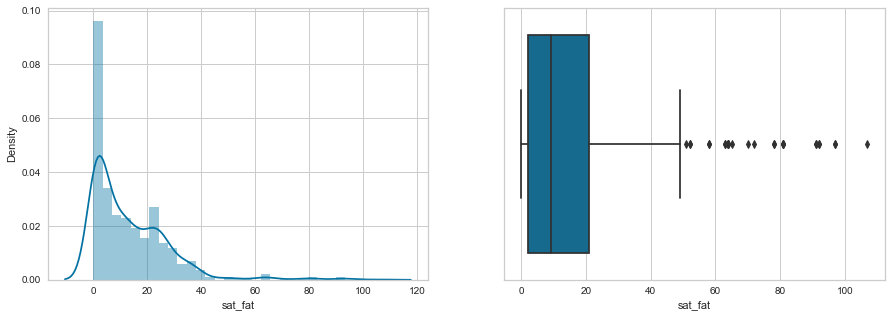

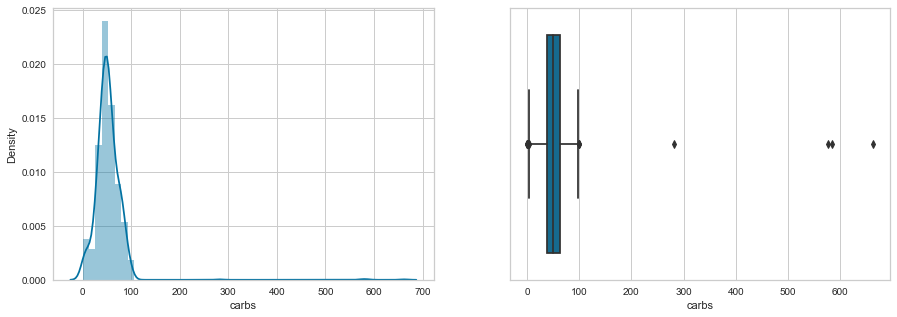

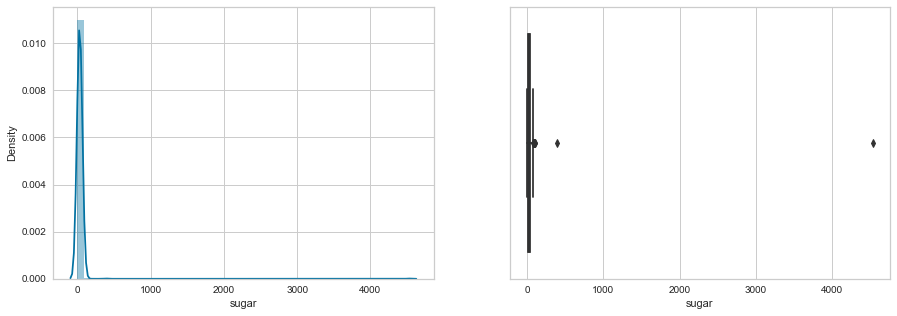

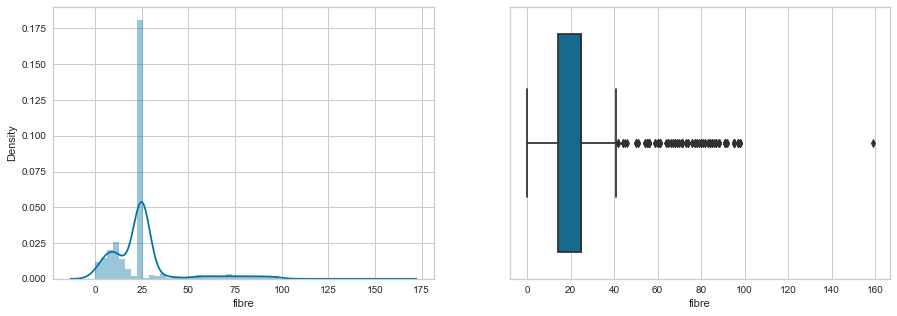

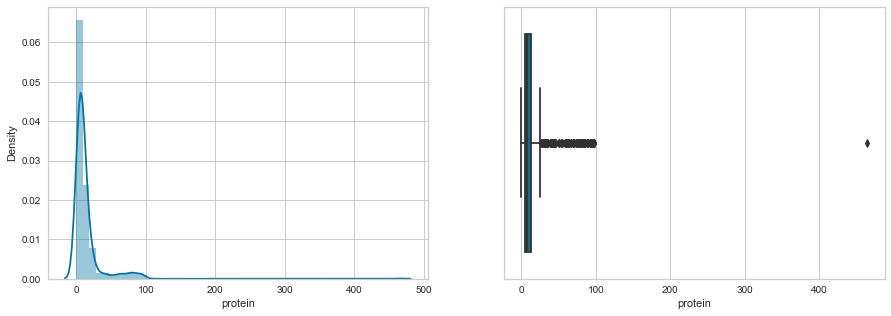

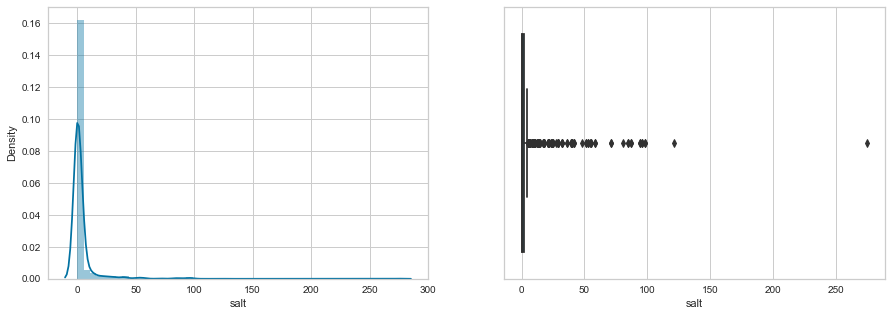

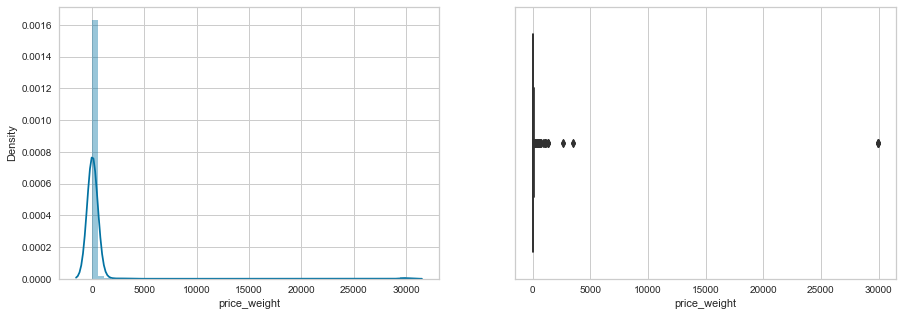

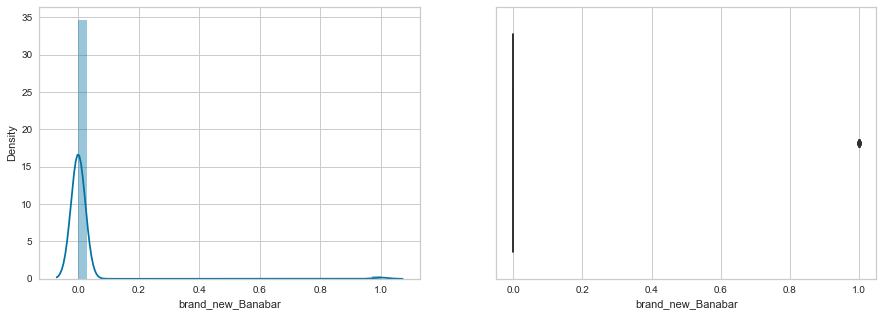

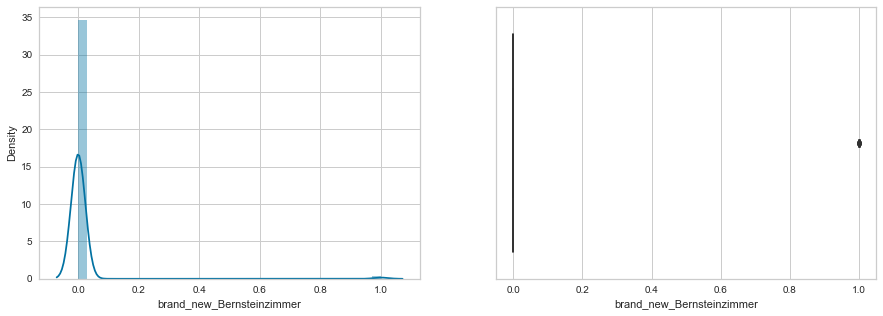

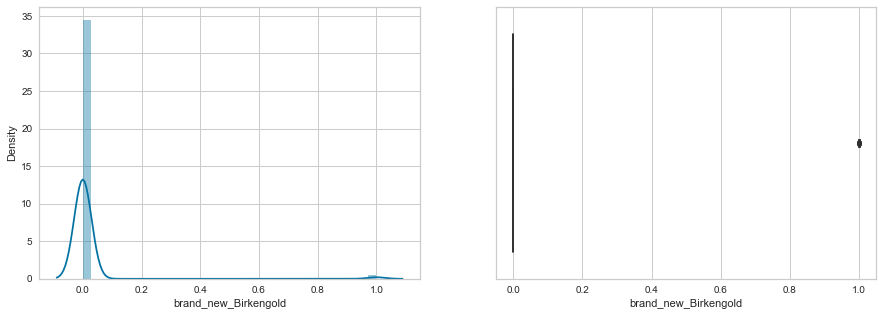

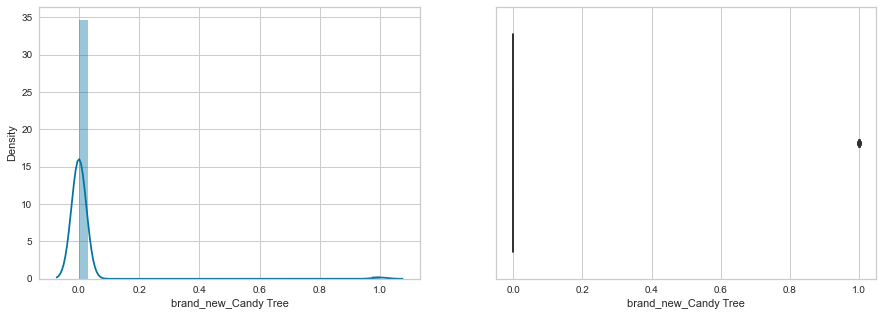

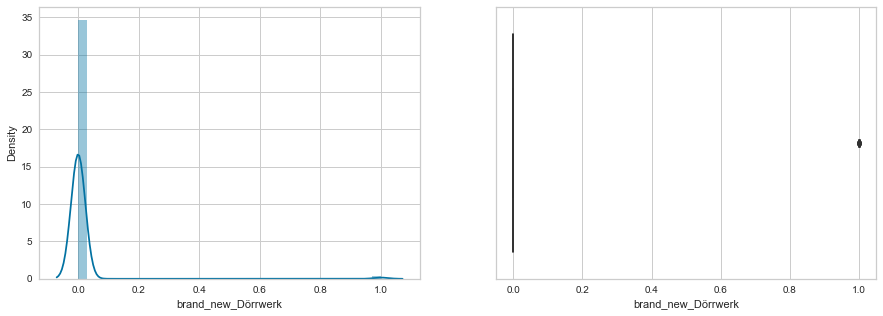

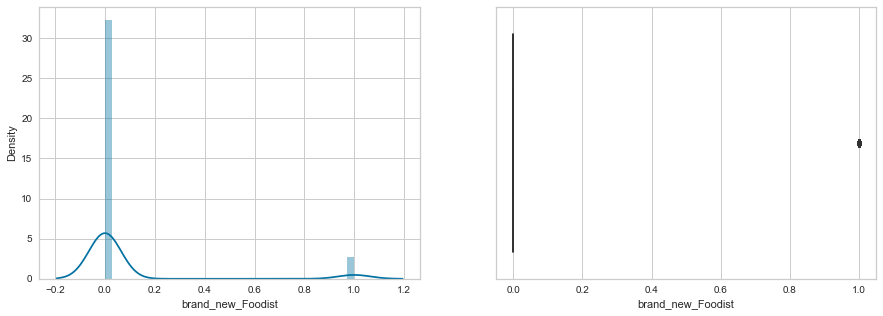

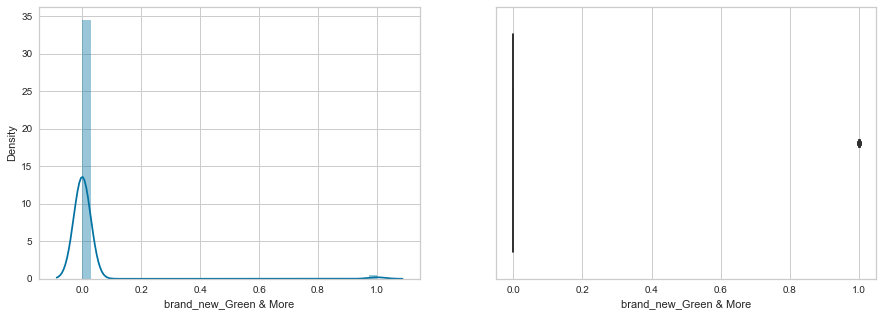

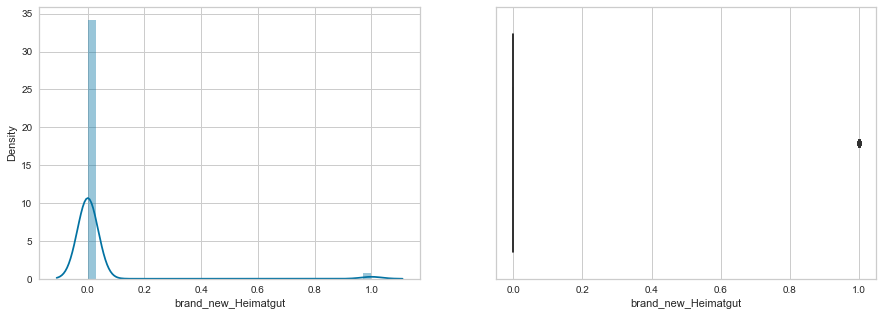

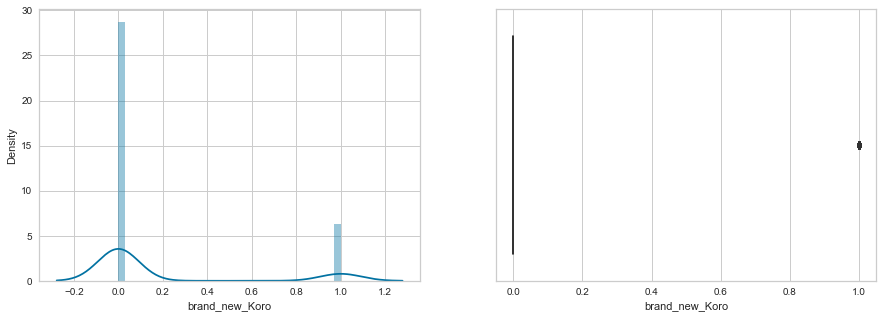

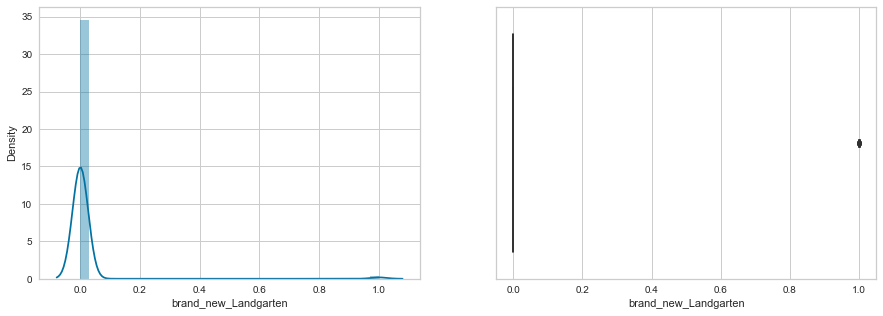

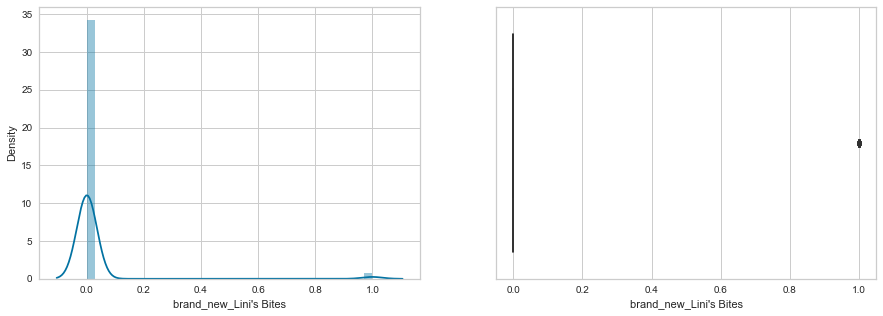

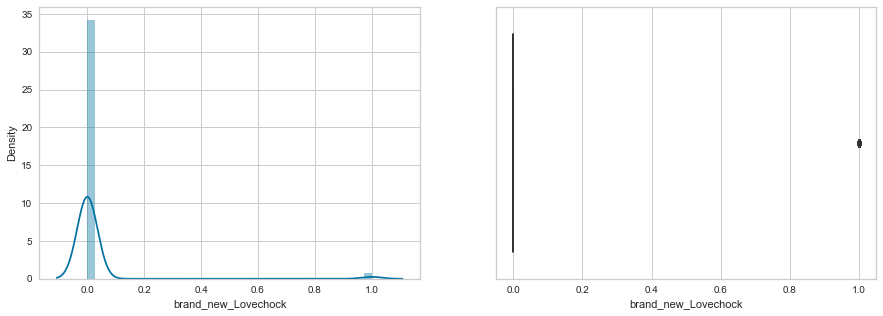

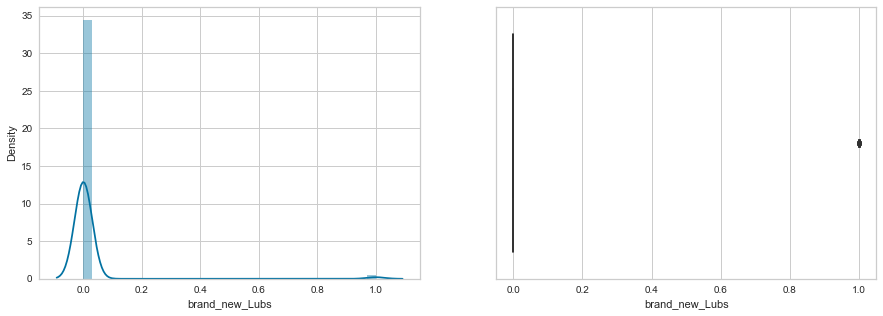

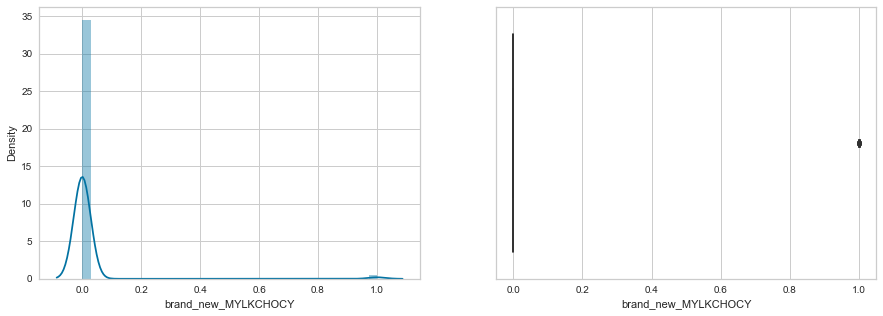

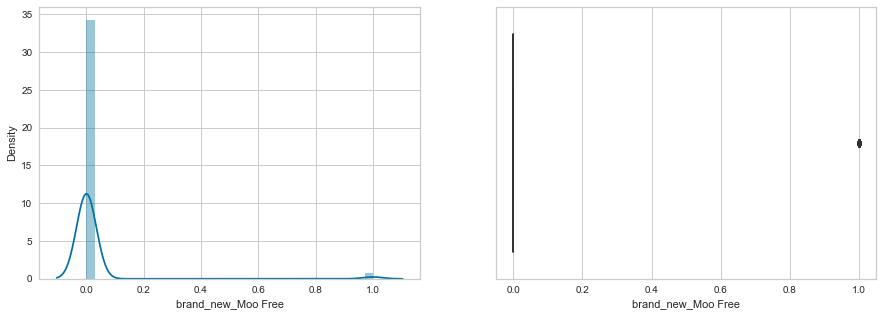

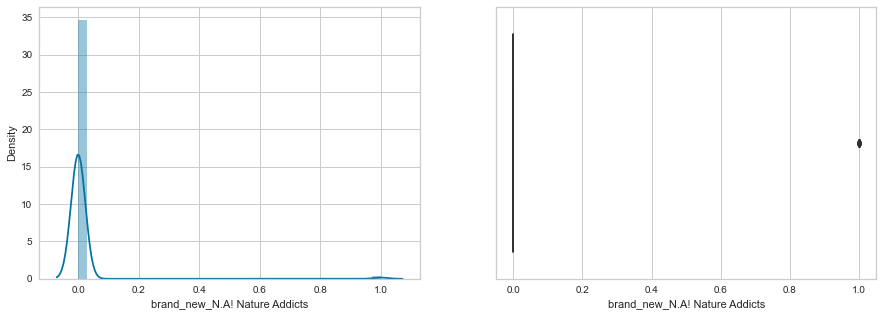

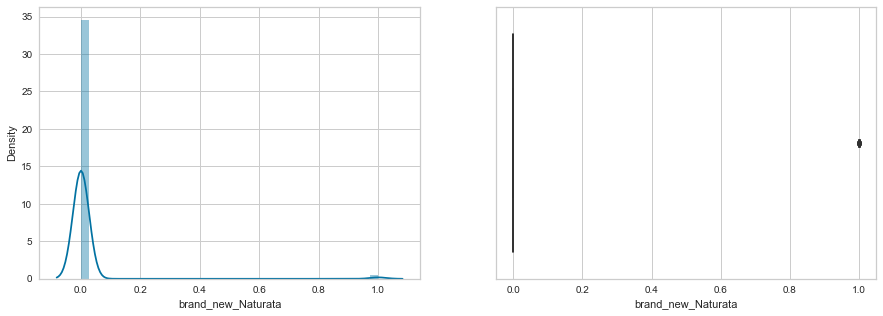

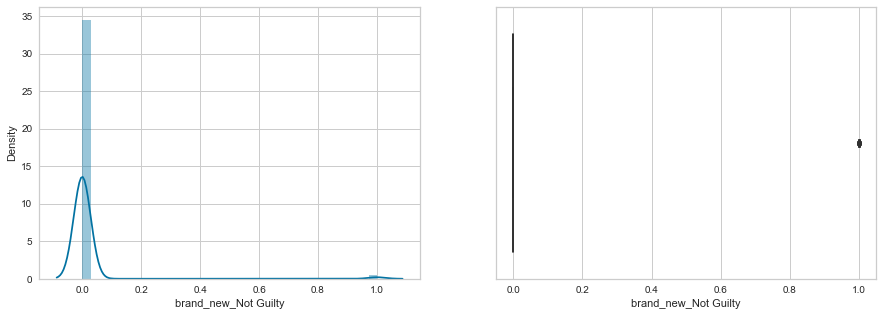

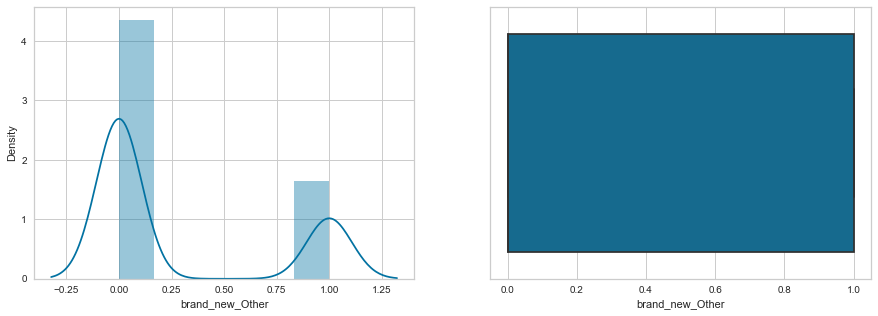

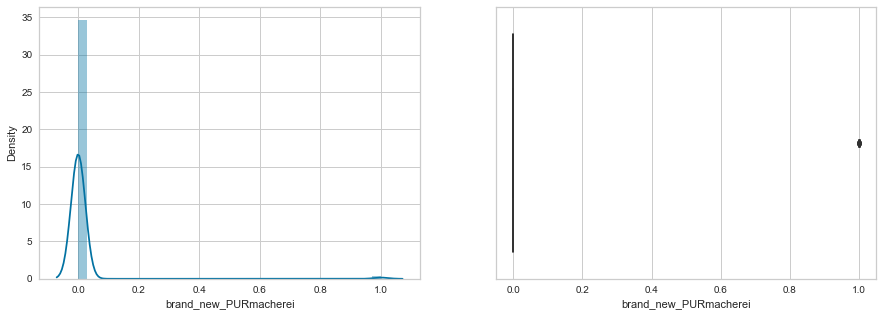

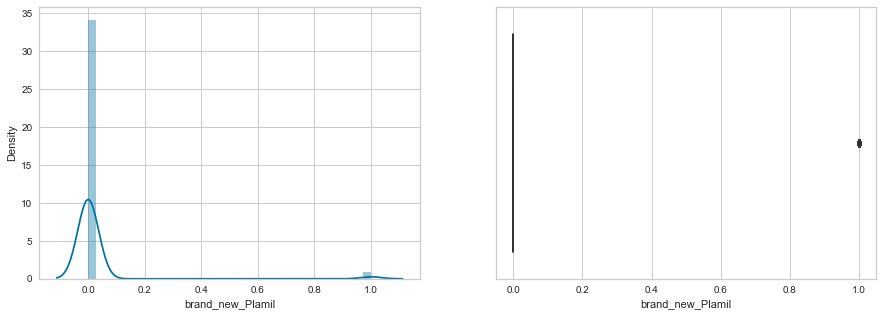

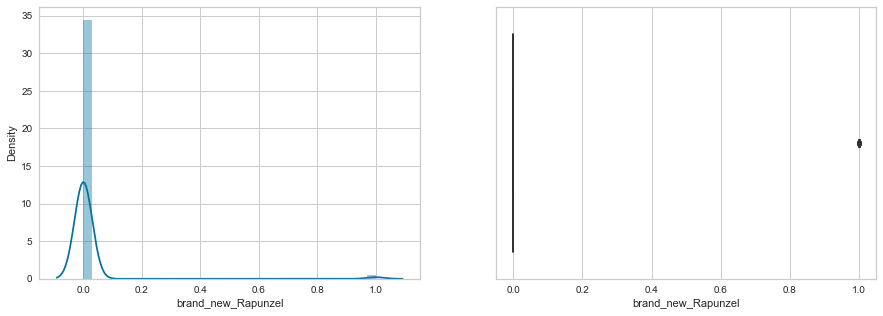

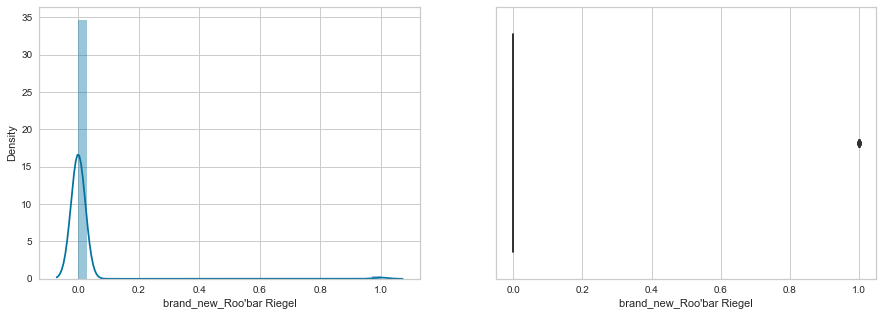

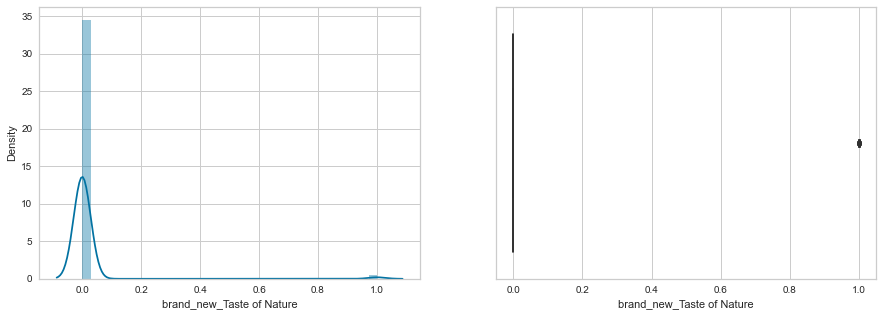

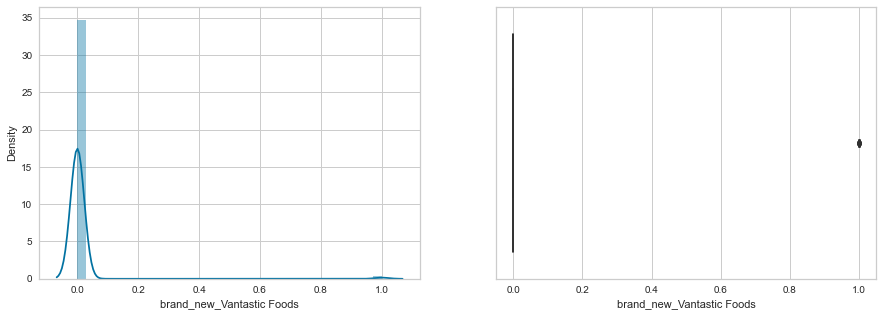

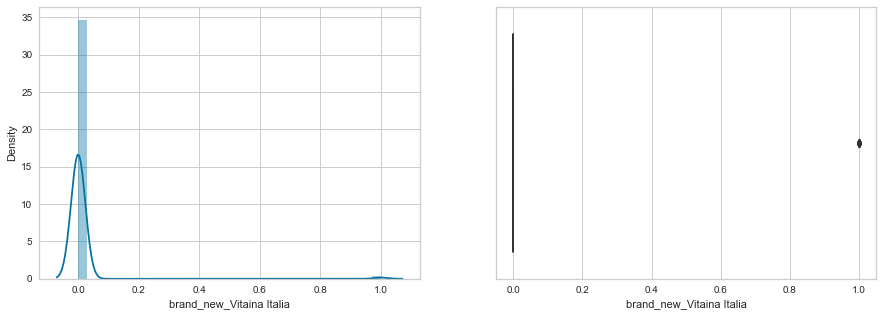

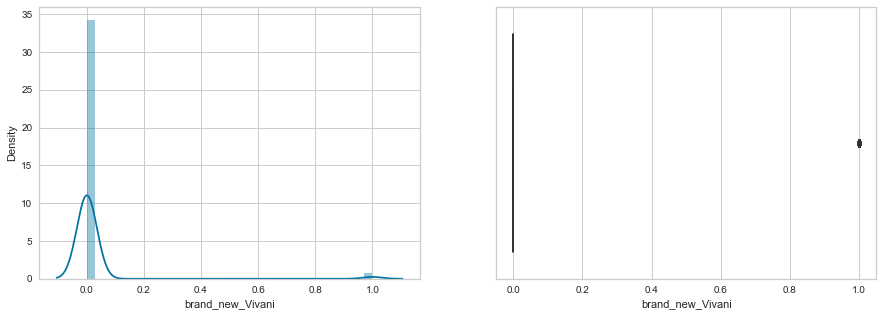

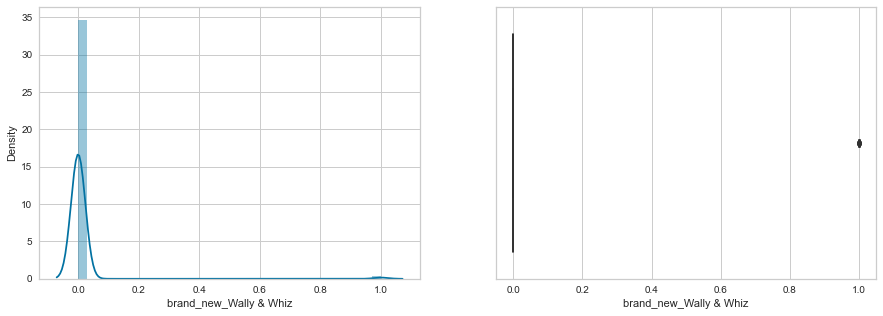

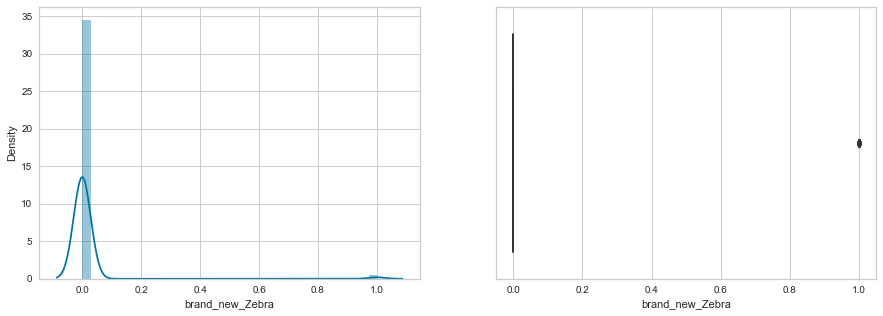

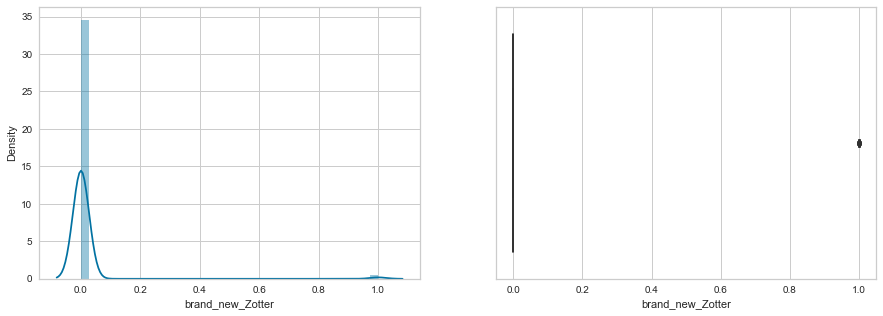

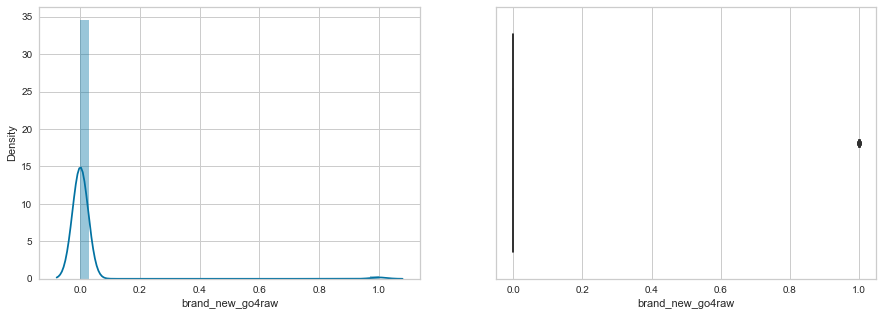

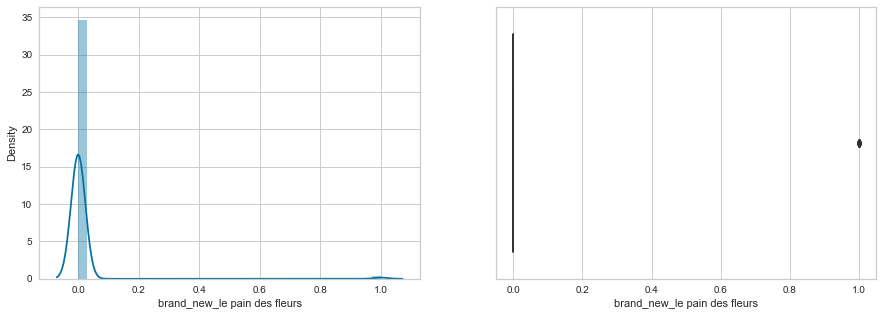

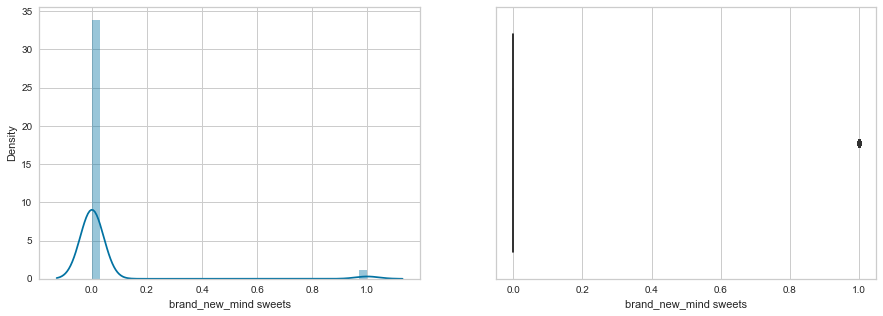

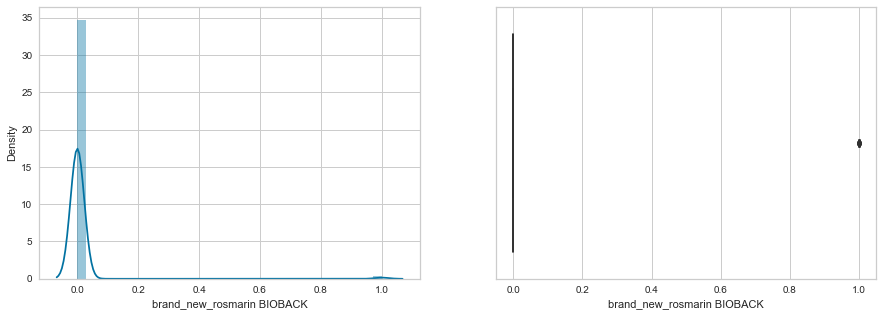

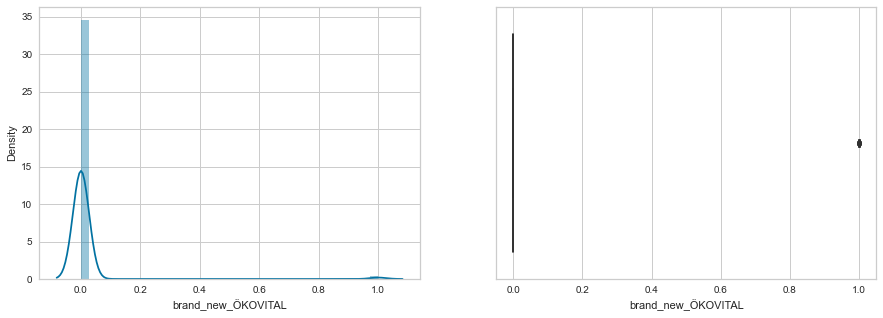

In [24]:
showing_dist_box(df_model)

In [25]:
df_model.columns

Index(['kcal', 'fat', 'sat_fat', 'carbs', 'sugar', 'fibre', 'protein', 'salt',
       'price_weight', 'brand_new_Banabar', 'brand_new_Bernsteinzimmer',
       'brand_new_Birkengold', 'brand_new_Candy Tree', 'brand_new_Dörrwerk',
       'brand_new_Foodist', 'brand_new_Green & More', 'brand_new_Heimatgut',
       'brand_new_Koro', 'brand_new_Landgarten', 'brand_new_Lini's Bites',
       'brand_new_Lovechock', 'brand_new_Lubs', 'brand_new_MYLKCHOCY',
       'brand_new_Moo Free', 'brand_new_N.A! Nature Addicts',
       'brand_new_Naturata', 'brand_new_Not Guilty', 'brand_new_Other',
       'brand_new_PURmacherei', 'brand_new_Plamil', 'brand_new_Rapunzel',
       'brand_new_Roo'bar Riegel', 'brand_new_Taste of Nature',
       'brand_new_Vantastic Foods', 'brand_new_Vitaina Italia',
       'brand_new_Vivani', 'brand_new_Wally & Whiz', 'brand_new_Zebra',
       'brand_new_Zotter', 'brand_new_go4raw', 'brand_new_le pain des fleurs',
       'brand_new_mind sweets', 'brand_new_rosmarin BIOBACK',

In [26]:
def cutting_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df.loc[df[column] > upper_limit, column] = upper_limit
            df.loc[df[column] < lower_limit, column] = lower_limit
    return df

In [27]:
in_col = ['kcal', 'fat', 'sat_fat', 'carbs', 'sugar',
       'fibre', 'protein', 'salt', 'price_weight']

skip_col = ['brand_new_Banabar',
       'brand_new_Bernsteinzimmer', 'brand_new_Birkengold',
       'brand_new_Candy Tree', 'brand_new_Dörrwerk', 'brand_new_Foodist',
       'brand_new_Green & More', 'brand_new_Heimatgut', 'brand_new_Koro',
       'brand_new_Landgarten', "brand_new_Lini's Bites", 'brand_new_Lovechock',
       'brand_new_Lubs', 'brand_new_MYLKCHOCY', 'brand_new_Moo Free',
       'brand_new_N.A! Nature Addicts', 'brand_new_Naturata',
       'brand_new_Not Guilty', 'brand_new_Other', 'brand_new_PURmacherei',
       'brand_new_Plamil', 'brand_new_Rapunzel', "brand_new_Roo'bar Riegel",
       'brand_new_Taste of Nature', 'brand_new_Vantastic Foods',
       'brand_new_Vitaina Italia', 'brand_new_Vivani',
       'brand_new_Wally & Whiz', 'brand_new_Zebra', 'brand_new_Zotter',
       'brand_new_go4raw', 'brand_new_le pain des fleurs',
       'brand_new_mind sweets', 'brand_new_rosmarin BIOBACK',
       'brand_new_ÖKOVITAL']

df_model = cutting_outliers(df_model, threshold=1.5, in_columns=in_col, skip_columns=skip_col)

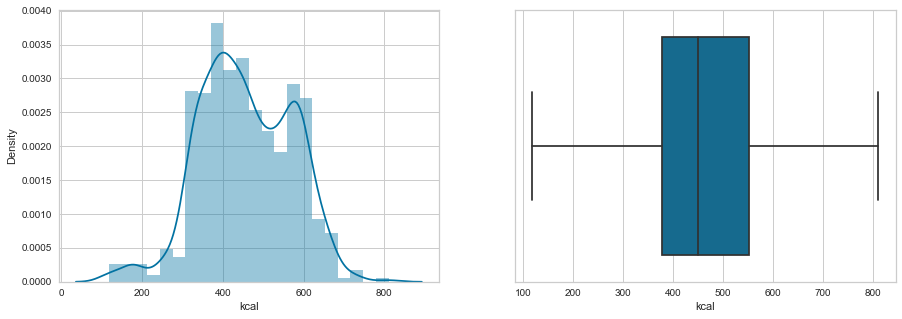

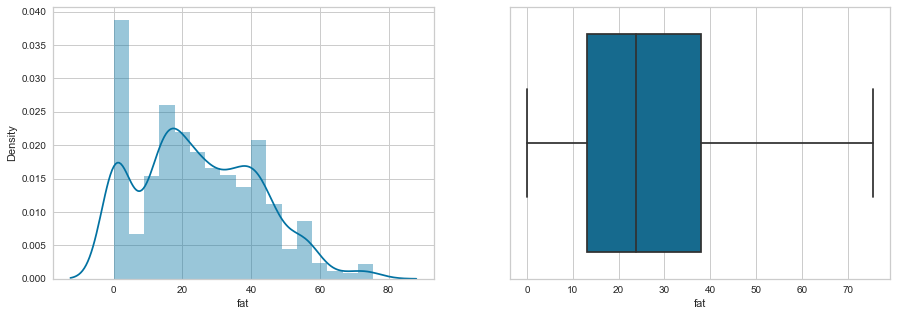

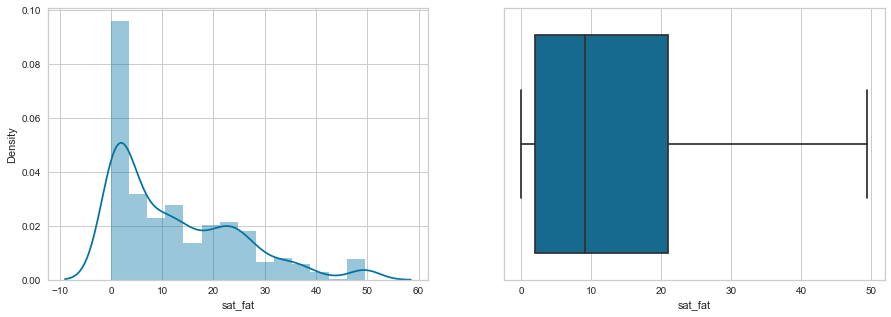

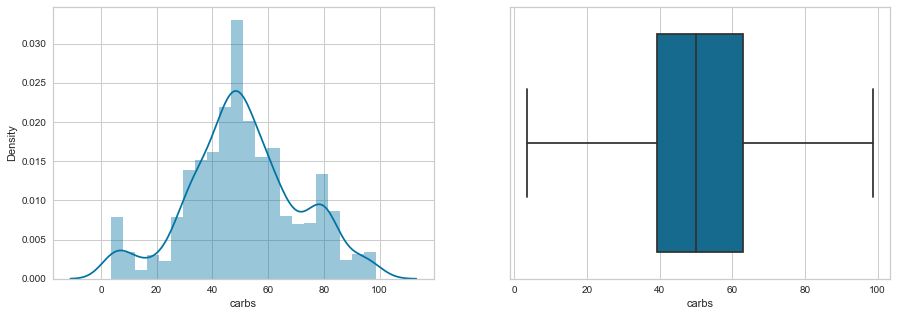

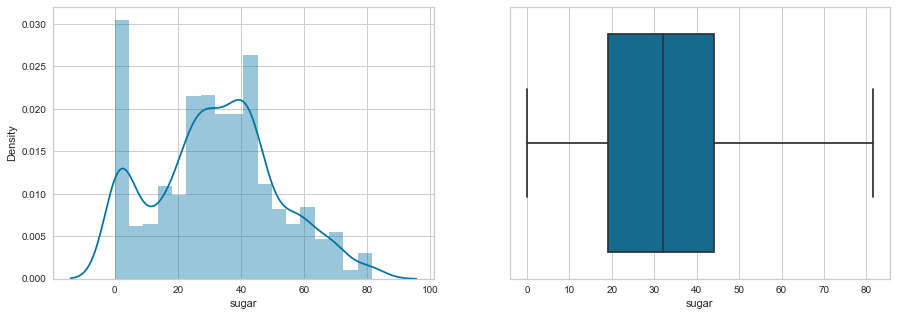

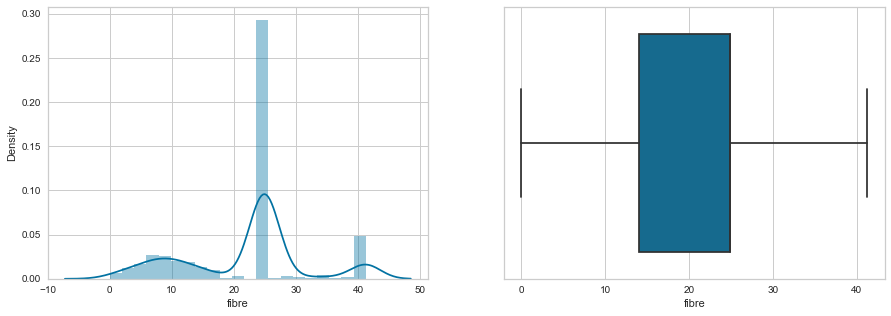

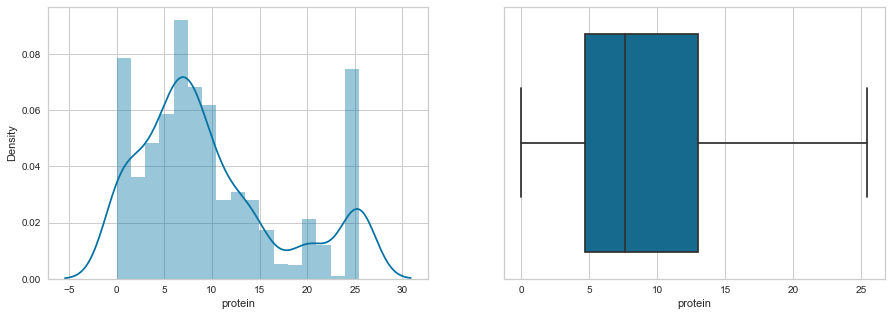

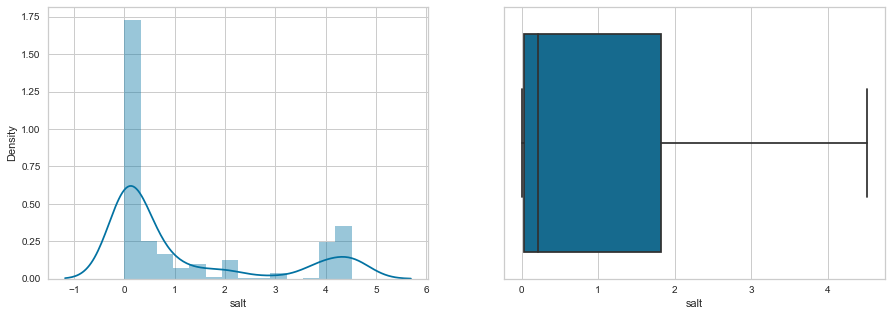

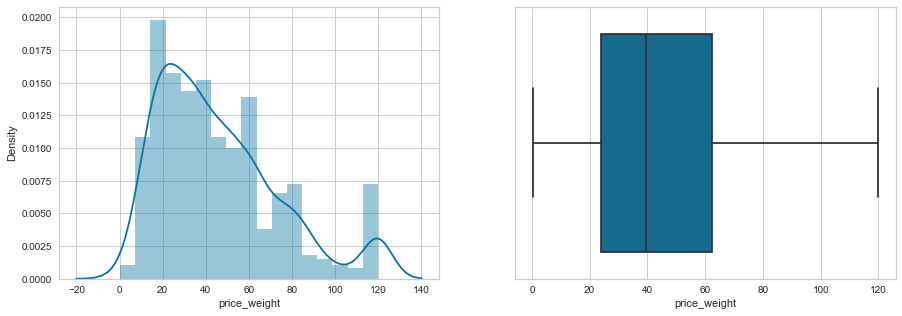

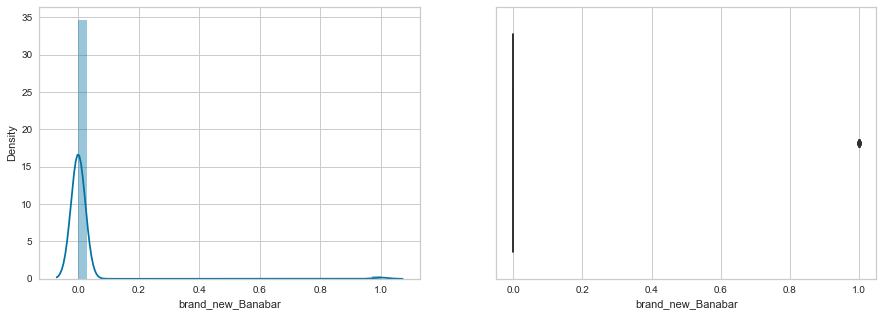

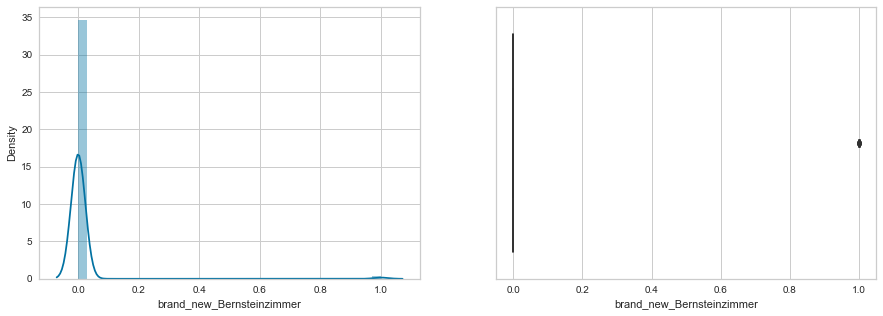

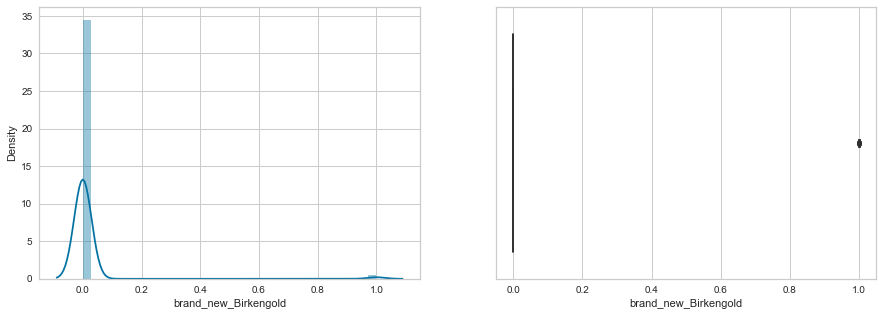

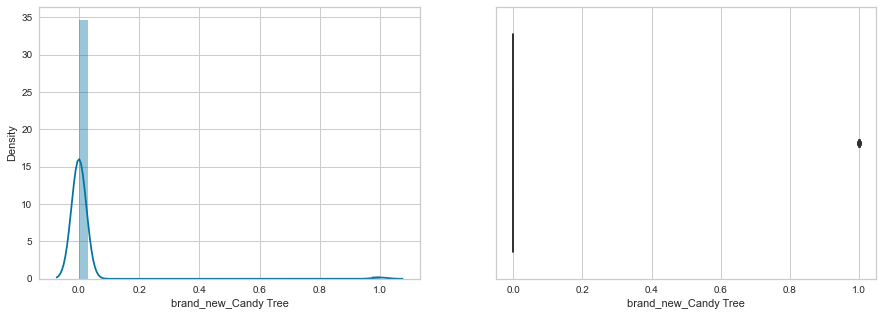

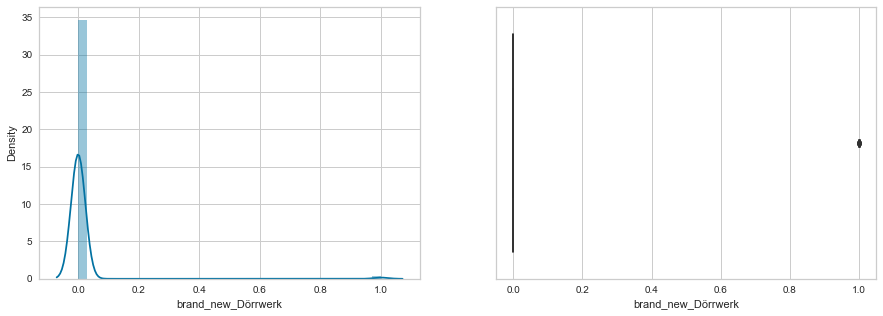

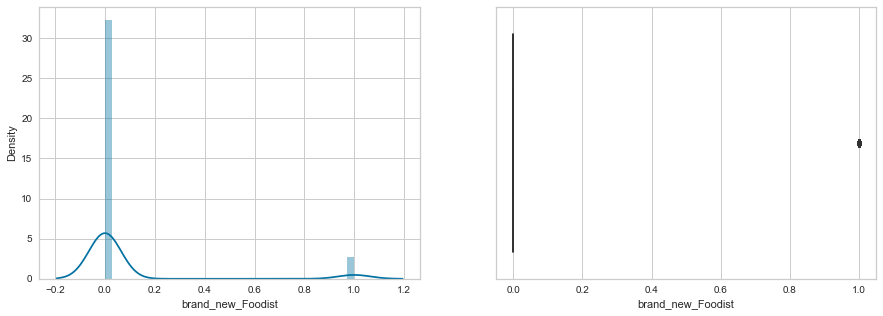

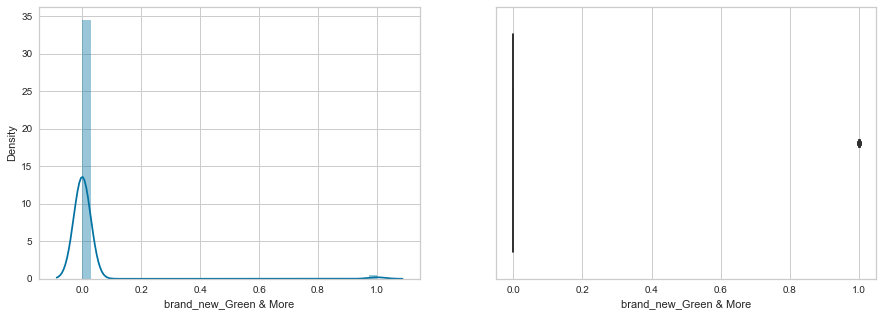

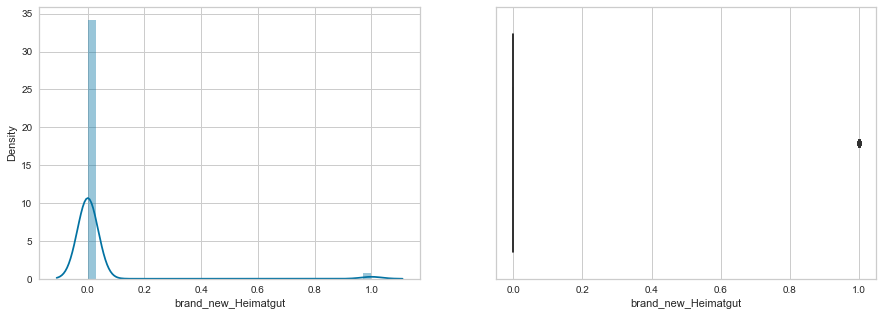

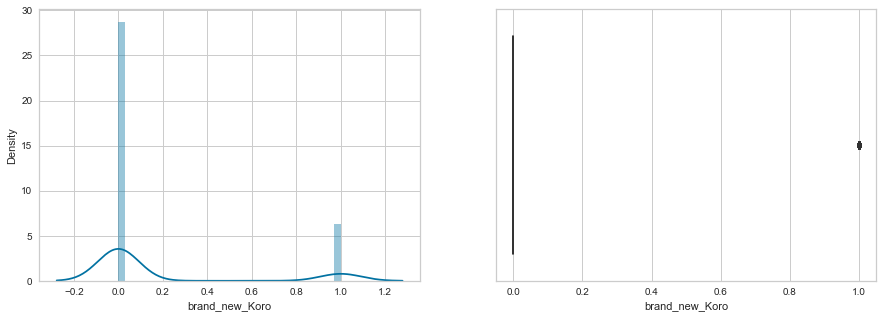

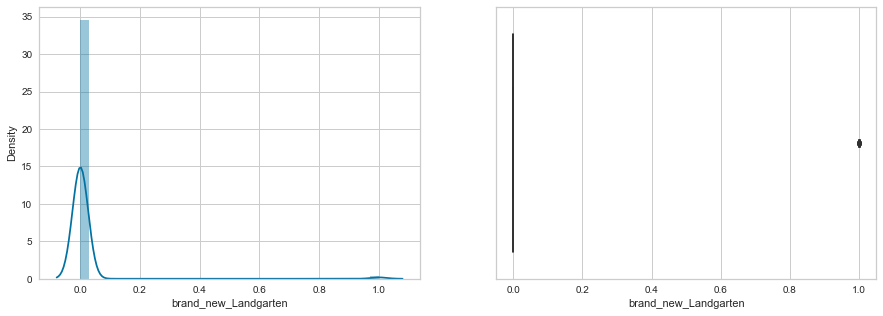

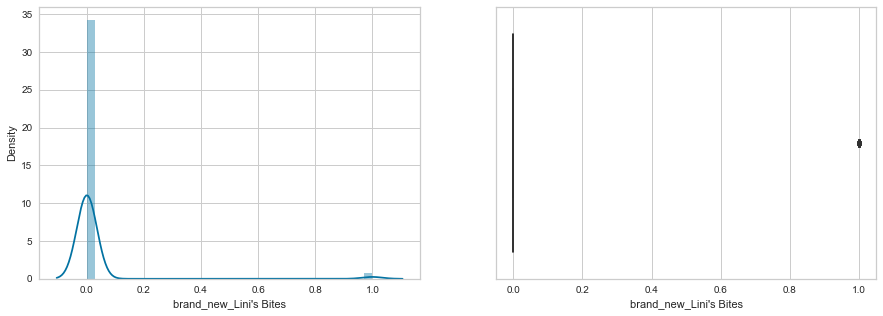

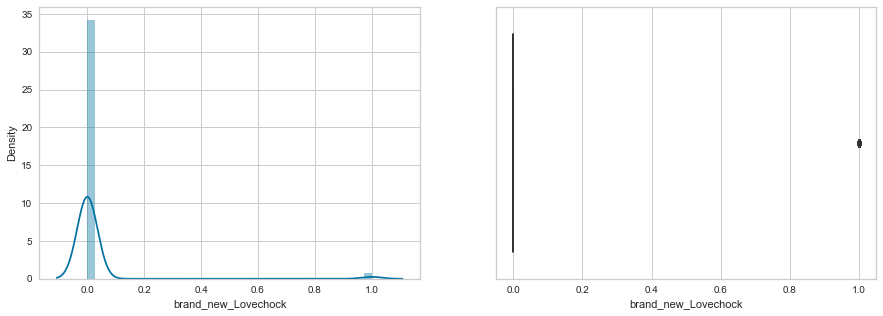

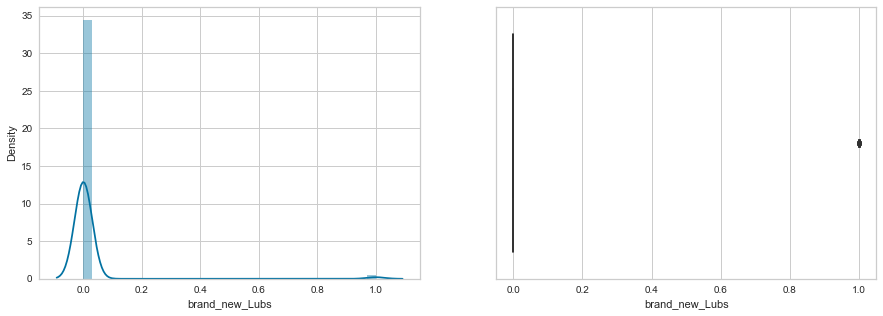

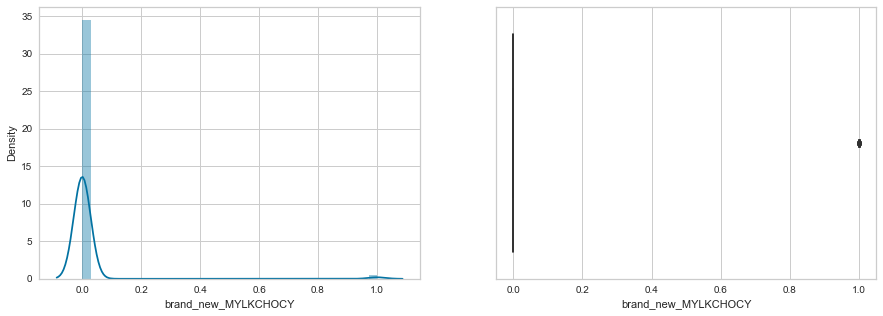

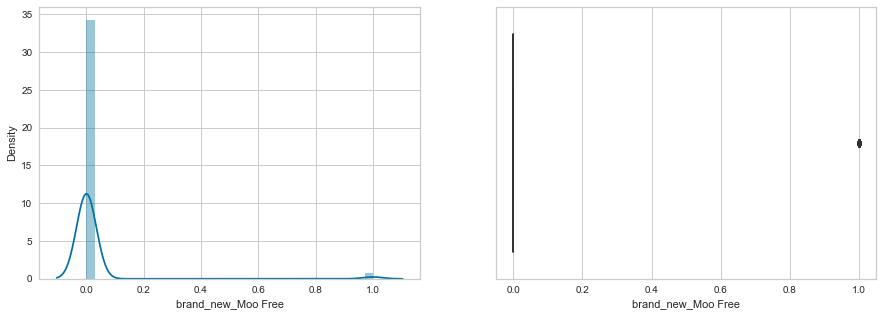

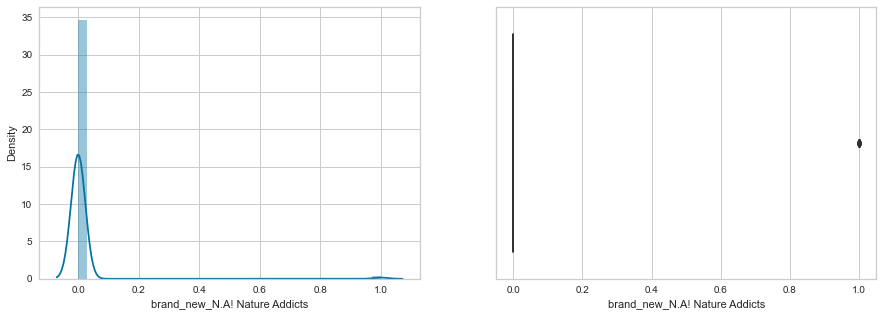

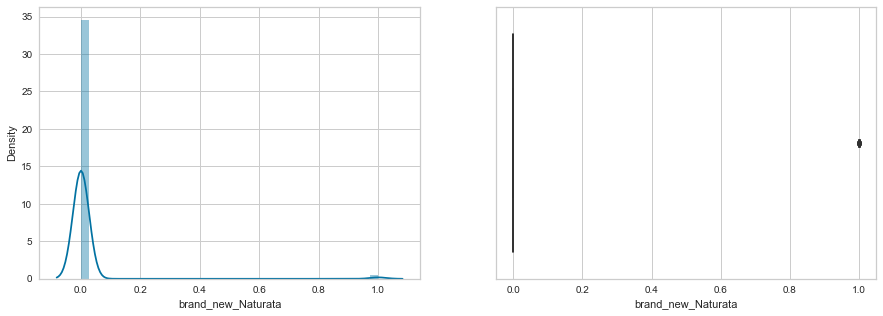

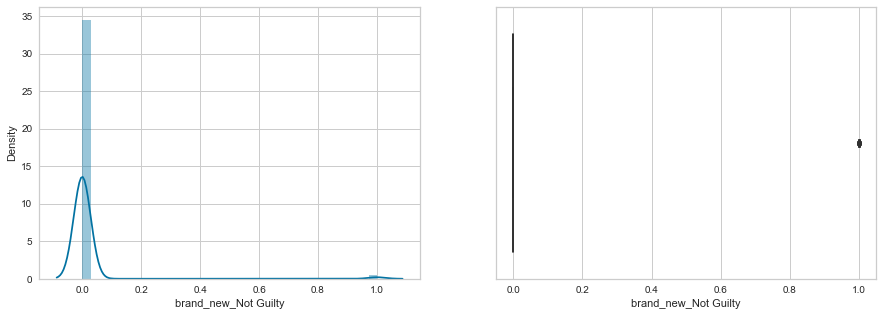

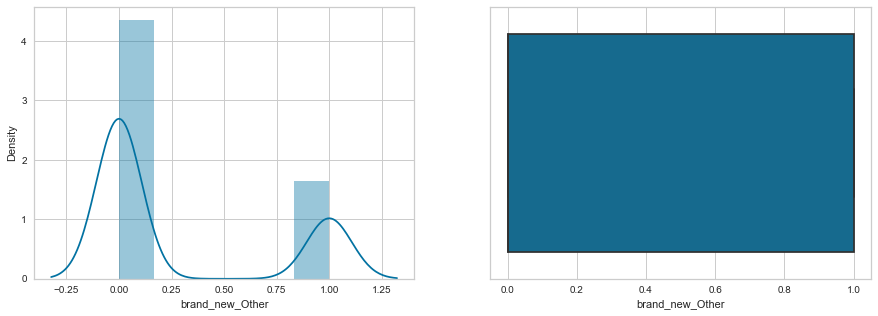

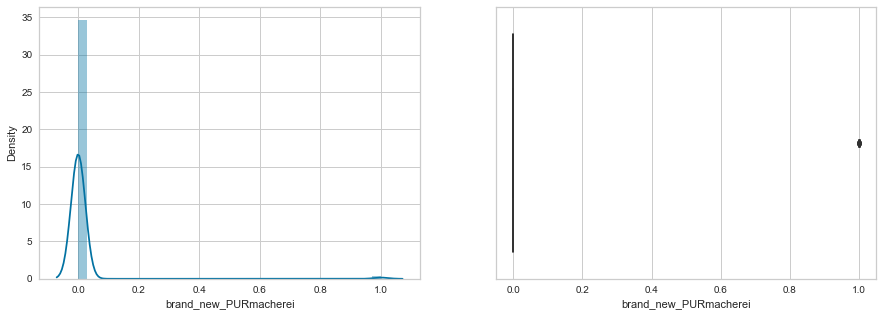

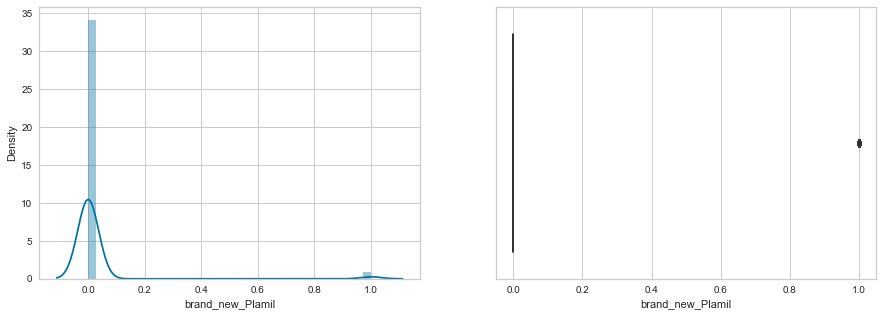

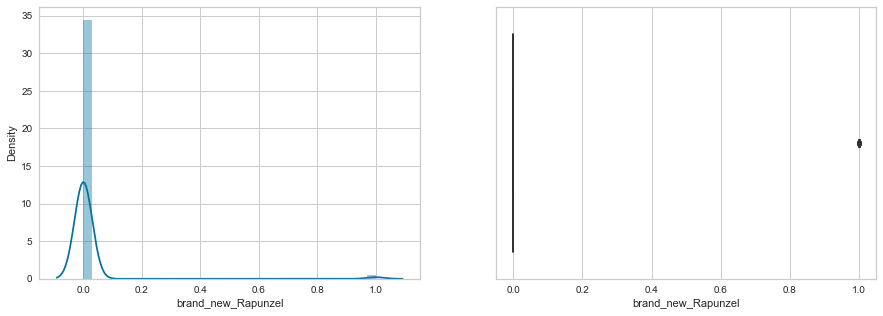

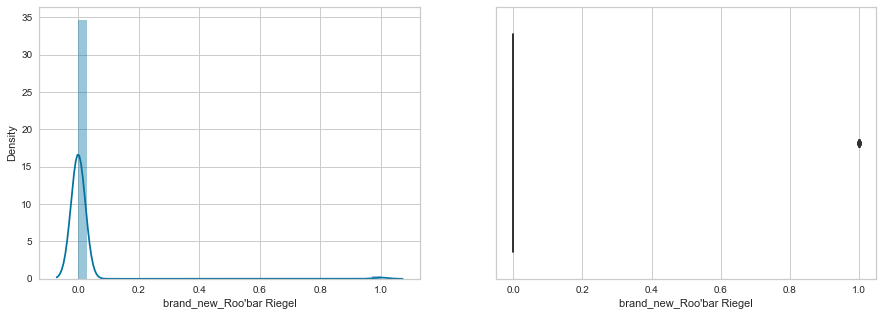

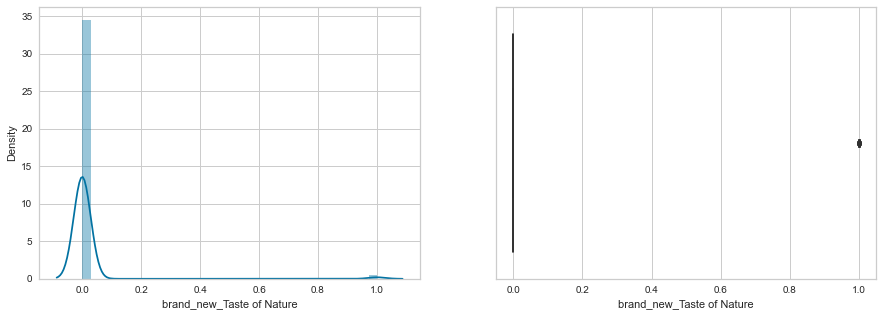

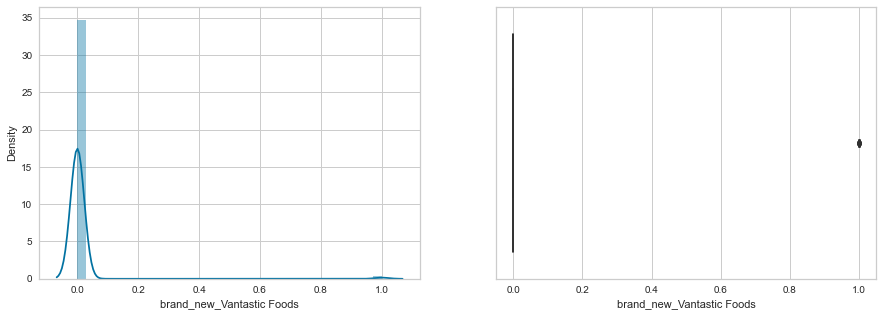

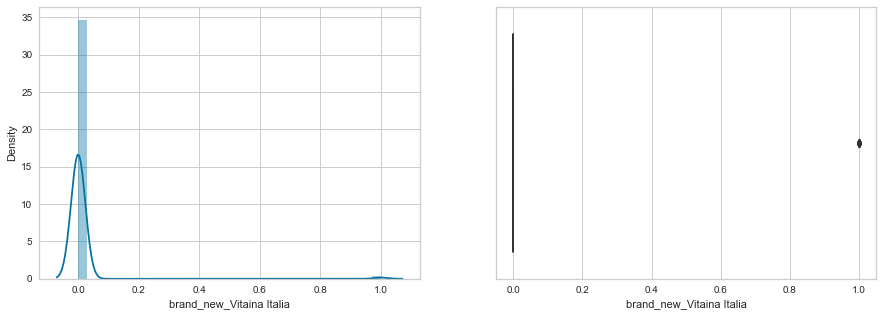

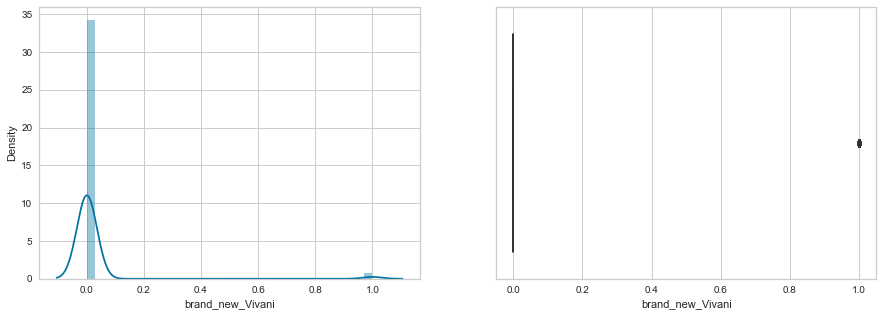

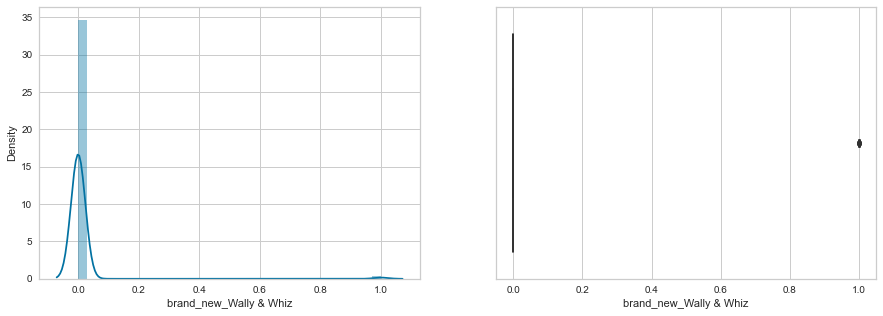

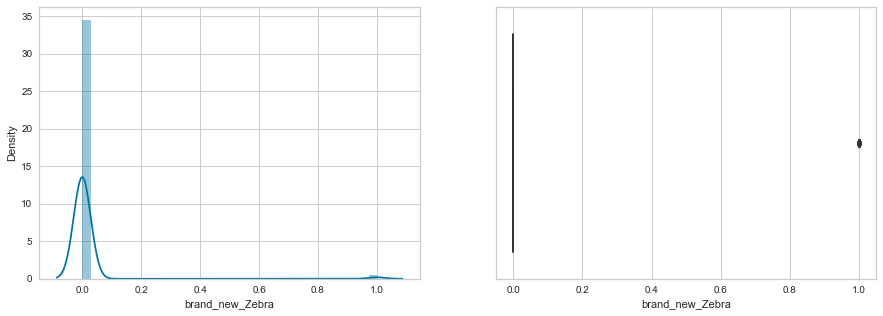

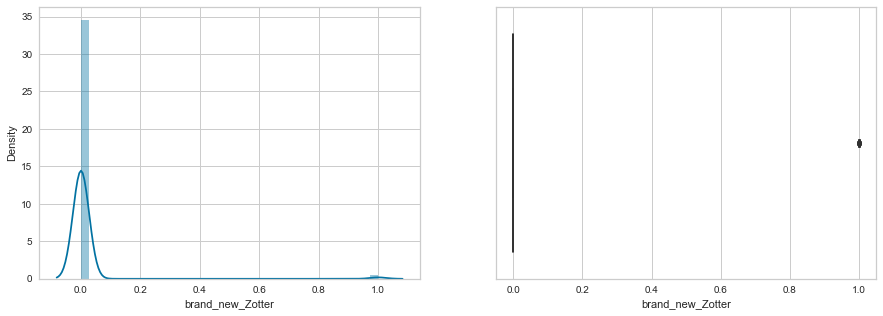

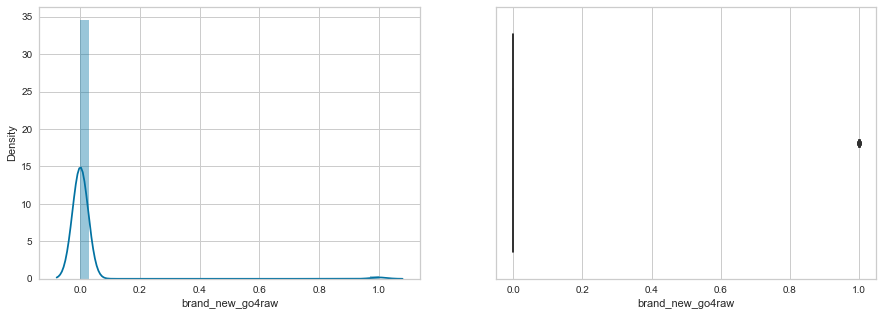

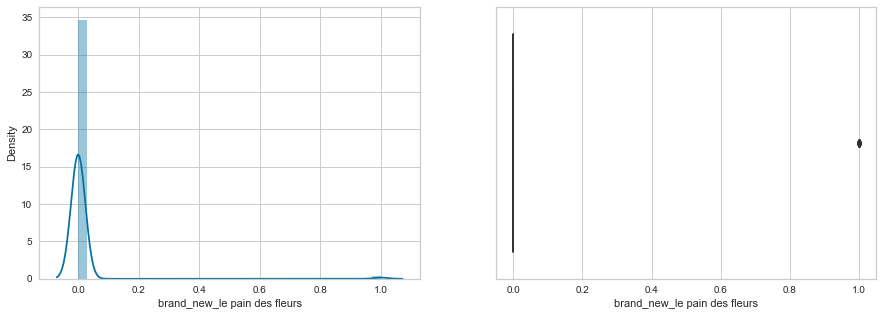

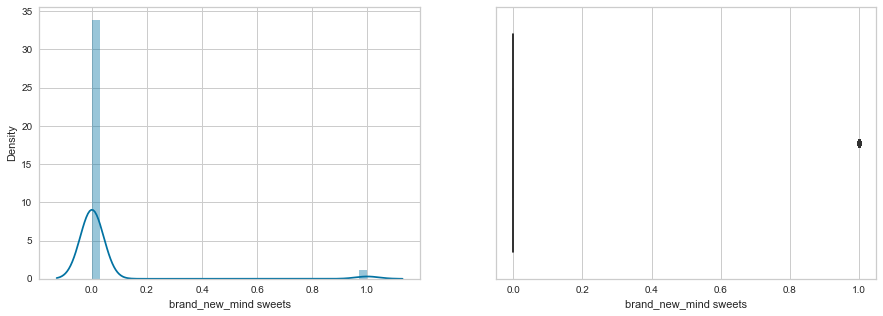

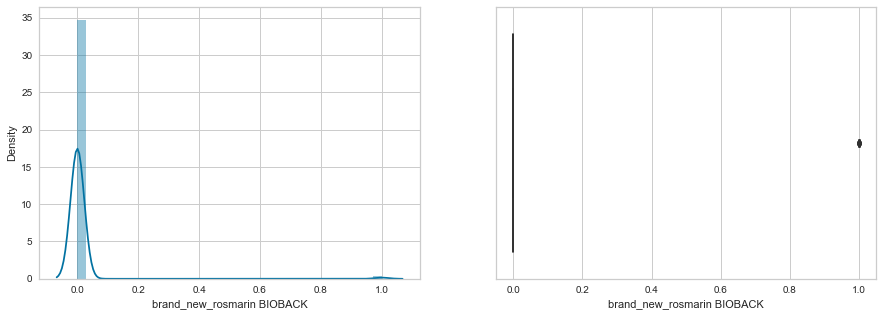

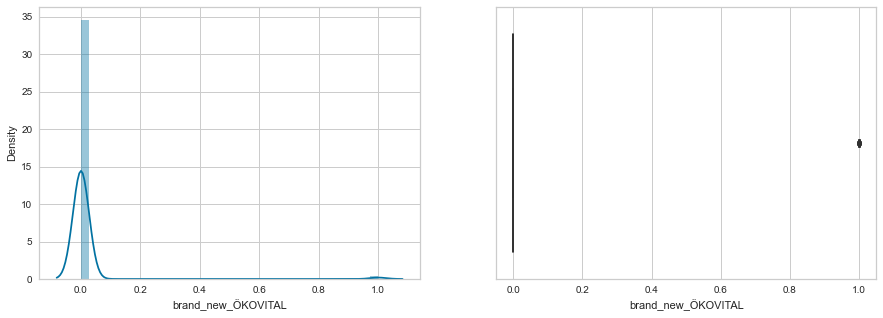

In [28]:
showing_dist_box(df_model)

### Scaling the data

In [29]:
df_model_sc = StandardScaler().fit_transform(df_model)
pd.DataFrame(df_model_sc).head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-0.831300,-0.338529,-0.698729,2.374001,2.533067,-0.389985,2.103745,2.064515,-1.125719,-0.099177,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
1,0.863320,1.218637,1.235795,-1.010864,-1.138195,-1.189500,2.103745,2.064515,-0.877976,-0.099177,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
2,-0.076184,0.180526,-0.053888,-0.710876,-0.932810,1.934797,1.510331,2.064515,-0.913368,-0.099177,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
3,-0.822519,-0.396202,-0.859940,-1.260854,-1.240888,-1.389379,2.103745,2.064515,-1.161111,-0.099177,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708
4,-0.313255,-0.626893,0.832769,-0.810872,1.788545,-1.189500,2.103745,2.064515,-1.214199,-0.099177,...,-0.099177,-0.149688,-0.099177,-0.121766,-0.114708,-0.11102,-0.099177,-0.183186,-0.094916,-0.114708


## New dataframe (less columns)

In [30]:
df_model_2 = df_model.copy()

In [32]:
drop = ['brand_new_Banabar',
       'brand_new_Bernsteinzimmer', 'brand_new_Birkengold',
       'brand_new_Candy Tree', 'brand_new_Dörrwerk', 'brand_new_Foodist',
       'brand_new_Green & More', 'brand_new_Heimatgut', 'brand_new_Koro',
       'brand_new_Landgarten', "brand_new_Lini's Bites", 'brand_new_Lovechock',
       'brand_new_Lubs', 'brand_new_MYLKCHOCY', 'brand_new_Moo Free',
       'brand_new_N.A! Nature Addicts', 'brand_new_Naturata',
       'brand_new_Not Guilty', 'brand_new_Other', 'brand_new_PURmacherei',
       'brand_new_Plamil', 'brand_new_Rapunzel', "brand_new_Roo'bar Riegel",
       'brand_new_Taste of Nature', 'brand_new_Vantastic Foods',
       'brand_new_Vitaina Italia', 'brand_new_Vivani',
       'brand_new_Wally & Whiz', 'brand_new_Zebra', 'brand_new_Zotter',
       'brand_new_go4raw', 'brand_new_le pain des fleurs',
       'brand_new_mind sweets', 'brand_new_rosmarin BIOBACK',
       'brand_new_ÖKOVITAL']
df_model_2 = df_model_2.drop(drop, axis=1)

In [33]:
df_model_2.head()

,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,price_weight
0,362.0,19.0,4.0,98.7,81.5,18.000000,25.45,4.5175,14.0
1,555.0,46.0,28.0,31.0,10.0,10.000000,25.45,4.5175,21.0
2,448.0,28.0,12.0,37.0,14.0,41.261905,21.00,4.5175,20.0
3,363.0,18.0,2.0,26.0,8.0,8.000000,25.45,4.5175,13.0
4,421.0,14.0,23.0,35.0,67.0,10.000000,25.45,4.5175,11.5


In [34]:
df_model_sc_2 = StandardScaler().fit_transform(df_model_2)
pd.DataFrame(df_model_sc_2).head()

,0,1,2,3,4,5,6,7,8
0,-0.831300,-0.338529,-0.698729,2.374001,2.533067,-0.389985,2.103745,2.064515,-1.125719
1,0.863320,1.218637,1.235795,-1.010864,-1.138195,-1.189500,2.103745,2.064515,-0.877976
2,-0.076184,0.180526,-0.053888,-0.710876,-0.932810,1.934797,1.510331,2.064515,-0.913368
3,-0.822519,-0.396202,-0.859940,-1.260854,-1.240888,-1.389379,2.103745,2.064515,-1.161111
4,-0.313255,-0.626893,0.832769,-0.810872,1.788545,-1.189500,2.103745,2.064515,-1.214199


## Model building

### First run (k=3)

#### df_1

In [35]:
kmeans = KMeans(n_clusters=3, random_state=13)
kmeans.fit(df_model_sc)

KMeans(n_clusters=3, random_state=13)

In [36]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc)
clusters

array([2, 0, 0, ..., 2, 2, 2])

In [37]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    552
1     16
2    664
dtype: int64

In [38]:
# "performance metric"
kmeans.inertia_

49557.88118601015

#### df_2

In [39]:
kmeans = KMeans(n_clusters=3, random_state=13)
kmeans.fit(df_model_sc_2)

KMeans(n_clusters=3, random_state=13)

In [40]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc_2)
clusters

array([2, 2, 2, ..., 1, 1, 1])

In [41]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    429
1    558
2    245
dtype: int64

In [42]:
# "performance metric"
kmeans.inertia_

7210.664131987626

### Chosing the best k

#### Inertia

##### df_1

In [43]:
kmeans = KMeans(n_clusters=3, random_state=13, verbose=1, n_init=1)
kmeans.fit(df_model_sc)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 68282.7629798726
Iteration 1, inertia 51467.28494495465
Iteration 2, inertia 51159.94838613149
Iteration 3, inertia 50753.39542177821
Iteration 4, inertia 50370.33270443875
Iteration 5, inertia 50118.759143839125
Iteration 6, inertia 50046.432482635624
Iteration 7, inertia 49970.67118508943
Iteration 8, inertia 49855.20608014109
Iteration 9, inertia 49739.202113334955
Iteration 10, inertia 49671.10040653319
Iteration 11, inertia 49624.889530430104
Iteration 12, inertia 49595.10208747439
Iteration 13, inertia 49591.79834119978
Iteration 14, inertia 49589.841603087356
Iteration 15, inertia 49588.12964579025
Iteration 16, inertia 49587.79328290657
Converged at iteration 16: center shift 9.193631124477981e-05 within tolerance 0.00010000000000000074.


49587.74126969325

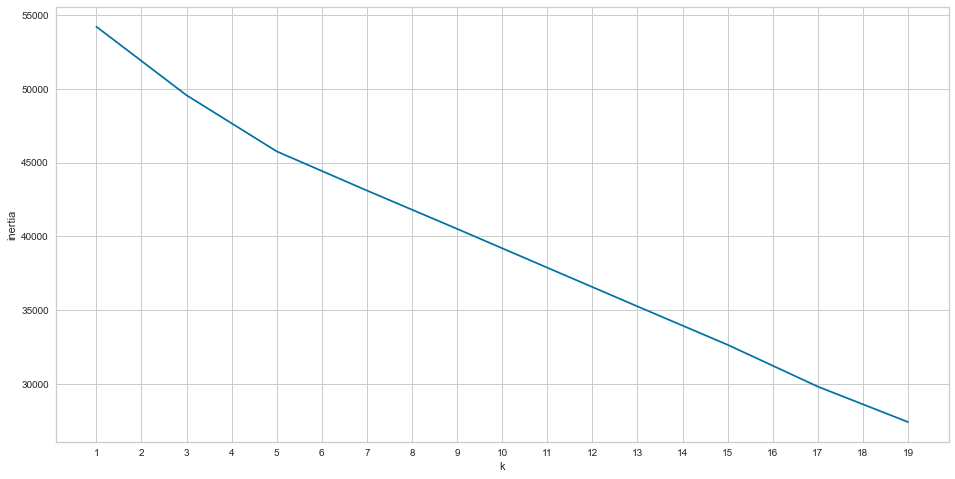

In [44]:
K = range(1, 20, 2)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

##### df_2

In [45]:
kmeans = KMeans(n_clusters=3, random_state=13, verbose=1, n_init=1)
kmeans.fit(df_model_sc_2)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 10297.232405722383
Iteration 1, inertia 7438.752714376172
Iteration 2, inertia 7334.14282756629
Iteration 3, inertia 7296.262792549461
Iteration 4, inertia 7276.106266497826
Iteration 5, inertia 7264.293433159723
Iteration 6, inertia 7262.0948799045445
Iteration 7, inertia 7261.589761264857
Iteration 8, inertia 7260.594439565942
Iteration 9, inertia 7259.589980654042
Iteration 10, inertia 7257.955673889152
Iteration 11, inertia 7257.883193928145
Converged at iteration 11: strict convergence.


7257.8831939281445

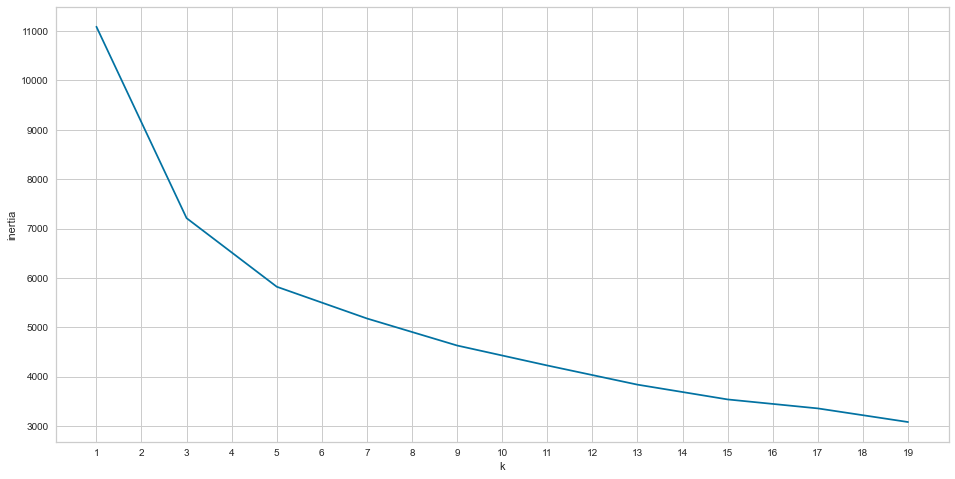

In [46]:
K = range(1, 20, 2)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc_2)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

#### Silhouette score

##### df_1

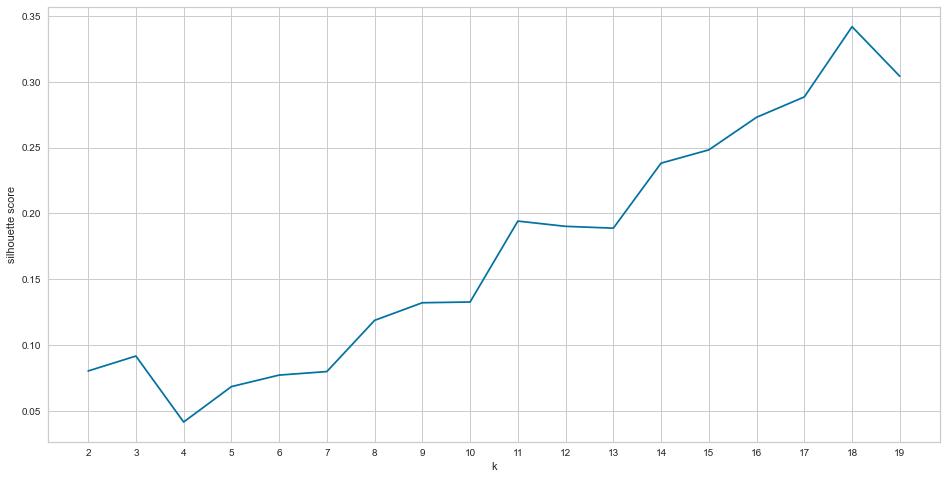

In [47]:
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc)
    silhouette.append(silhouette_score(df_model_sc, kmeans.predict(df_model_sc)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

##### df_2

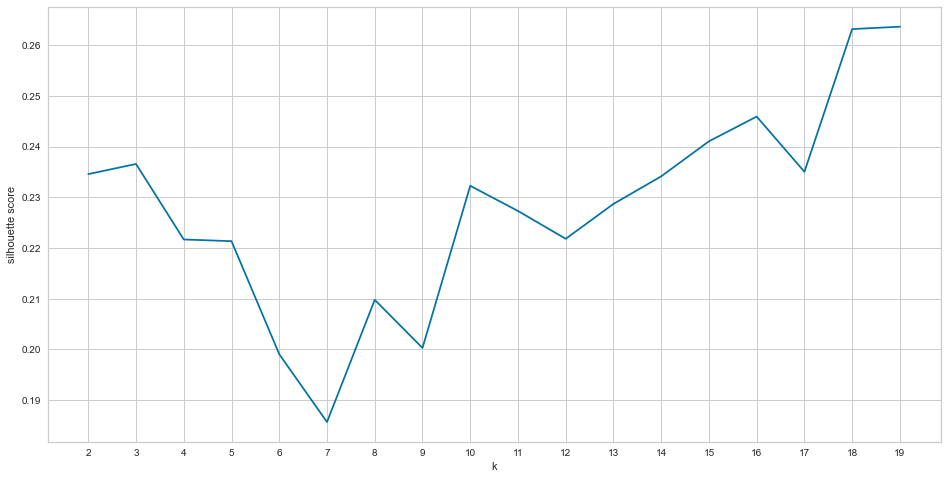

In [48]:
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=13)
    kmeans.fit(df_model_sc_2)
    silhouette.append(silhouette_score(df_model_sc_2, kmeans.predict(df_model_sc_2)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

#### Elbow method

##### df_1

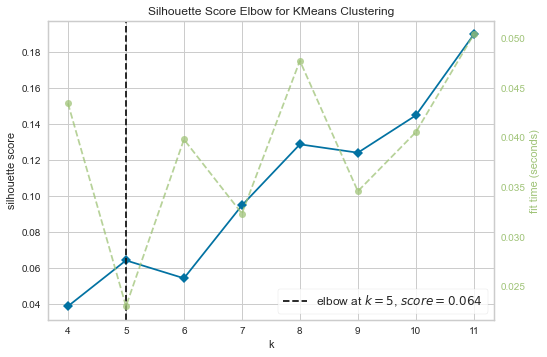

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(df_model_sc)
visualizer.show()

##### df_2

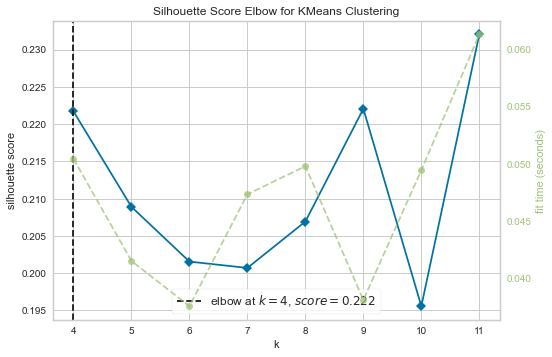

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [50]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette')

visualizer.fit(df_model_sc_2)
visualizer.show()

### Final models (k=5, k=4)

#### df_1

In [51]:
kmeans = KMeans(n_clusters=5, random_state=13)
kmeans.fit(df_model_sc)

KMeans(n_clusters=5, random_state=13)

In [52]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc)
clusters

array([0, 0, 0, ..., 1, 2, 2])

In [53]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    208
1    220
2    471
3     26
4    307
dtype: int64

In [54]:
# Explore the cluster assignment in the original dataset
df['cluster'] = clusters
df.sample(25)

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link,price_weight,brand_new,cluster
174,Bio Mikrowellen Popcorn salzig,Koro,11.00,0.0972,1693.0,404.0,15.0,64.0,55.0,12.0,67.0,84.0,40.00,https://www.korodrogerie.de/bio-mikrowellen-po...,https://koro2.imgix.net/media/image/19/ee/9e/B...,113.168724,Koro,0
233,°Snowball° Schneeball Weiße Schokolade mit Mar...,Moo Free,3.99,0.0650,2337.0,560.0,33.0,20.0,62.0,43.0,NaN,1.0,0.00,https://kokku-online.de/moo-free-snowball-weis...,https://kokku-online.de//bilder/350x350/19117/...,61.384615,Moo Free,3
778,"BIO Getrocknete Kirschen, knusprig",Supersec,4.85,0.1400,1380.0,325.0,0.5,0.2,80.0,67.5,NaN,2.5,0.00,https://www.foodist.de/supersec-bio-getrocknet...,https://foodist.imgix.net/media/image/54250331...,34.642857,Other,2
782,BIO Schokoladen Weihnachtsmann,Foodist,4.99,0.0700,2516.0,599.0,46.0,29.0,43.0,29.0,NaN,3.1,0.14,https://www.foodist.de/foodist-bio-schokoladen...,https://foodist.imgix.net/media/image/foodists...,71.285714,Foodist,1
1112,"Schokomandeln, leicht gesalzen 500g",Foodist,9.95,0.5000,2268.0,545.0,35.0,14.0,46.0,43.0,7.0,8.1,0.37,https://www.foodist.de/foodist-schokomandeln-l...,https://foodist.imgix.net/media/image/42604537...,19.900000,Foodist,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,Amarenakirsche in Zartbitter,Landgarten,1.99,0.0500,2118.0,509.0,32.0,19.0,46.0,43.0,NaN,5.1,0.03,https://kokku-online.de/landgarten-naschfruech...,https://kokku-online.de//bilder/350x350/1868/l...,39.800000,Landgarten,4
918,BIO Cookies mit Nüssen und Blaubeeren,Green & More,2.20,0.0280,2059.0,491.0,39.0,3.0,40.0,24.0,8.0,13.0,3.00,https://www.foodist.de/green-more-bio-cookies-...,https://foodist.imgix.net/media/image/38598915...,78.571429,Green & More,1
1113,BIO Zartbitterschokolade mit Kakaonibs,Lovechock,2.90,0.0400,2674.0,646.0,55.0,33.0,26.0,16.0,7.8,8.1,0.04,https://www.foodist.de/lovechock-bio-zartbitte...,https://foodist.imgix.net/media/image/87184211...,72.500000,Lovechock,4
531,Reis Quinoa Crisp Schokolade,Naturata,2.59,0.1000,2430.0,584.0,40.0,24.0,52.0,37.0,NaN,3.0,0.21,https://kokku-online.de/naturata-reis-quinoa-c...,https://kokku-online.de//bilder/350x350/9921/n...,25.900000,Naturata,4


In [55]:
# "performance metric"
kmeans.inertia_

45752.33149124588

#### df_2

In [56]:
kmeans = KMeans(n_clusters=4, random_state=13)
kmeans.fit(df_model_sc_2)

KMeans(n_clusters=4, random_state=13)

In [57]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(df_model_sc_2)
clusters

array([2, 3, 3, ..., 1, 2, 2])

In [58]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    363
1    418
2    257
3    194
dtype: int64

In [59]:
# Explore the cluster assignment in the original dataset
df['cluster_2'] = clusters
df.sample(25)

,product,brand,price,weight,kj,kcal,fat,sat_fat,carbs,sugar,fibre,protein,salt,product_link,photo_link,price_weight,brand_new,cluster,cluster_2
417,Ökovital Bär Gummibären ohne Gelatine,ÖKOVITAL,1.59,0.100,1372.0,323.0,0.1,0.1,78.0,58.0,NaN,NaN,0.75,https://kokku-online.de/oekovital-oekovital-ba...,https://kokku-online.de//bilder/350x350/13486/...,15.900000,ÖKOVITAL,2,2
961,Schokoliertes Edelmarzipan Brot,Sawade,5.99,0.125,2057.0,493.0,31.2,7.8,39.2,37.6,NaN,9.7,0.02,https://www.foodist.de/sawade-schokoliertes-ed...,https://foodist.imgix.net/media/image/40005699...,47.920000,Other,2,1
404,Dark & Creamy Schokoriegel,Vivani,0.99,0.035,2481.0,598.0,44.9,27.3,39.7,36.0,NaN,4.8,0.01,https://kokku-online.de/vivani-dark-und-creamy...,https://kokku-online.de//bilder/350x350/12805/...,28.285714,Vivani,4,0
41,Geröstete Kichererbsen BBQ,Koro,12.00,1.000,1769.0,422.0,15.0,18.0,45.0,40.0,15.0,19.0,10.00,https://www.korodrogerie.de/geroestete-kichere...,https://koro2.imgix.net/media/image/1d/c0/06/K...,12.000000,Koro,0,3
698,Spacebar Red Hot Chili Peppers,Wheaty,1.19,0.040,1038.0,248.0,11.7,8.8,3.3,0.5,NaN,31.4,1.30,https://kokku-online.de/topas-wheaty-spacebar-...,https://kokku-online.de//bilder/350x350/18762/...,29.750000,Other,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,BIO Dehydrierter Roter Apfel,Vitaina Italia,2.79,0.030,1528.0,364.0,1.5,0.9,82.0,65.0,8.0,1.6,0.30,https://www.foodist.de/vitaina-italia-bio-dehy...,https://foodist.imgix.net/media/image/Vitaina_...,93.000000,Vitaina Italia,2,2
513,Riegel °Sunflower & Sesam-Tahini°,go4raw,0.99,0.025,1885.0,449.0,17.5,2.3,57.0,26.0,NaN,12.3,0.02,https://kokku-online.de/go4raw-riegel-sunflowe...,https://kokku-online.de//bilder/350x350/10365/...,39.600000,go4raw,2,1
484,Lucky Sticks Himbeerstangen,mind sweets,2.59,0.075,1431.0,337.0,0.3,0.1,81.4,42.2,NaN,2.0,0.10,https://kokku-online.de/mind-sweets-lucky-stic...,https://kokku-online.de//bilder/350x350/11577/...,34.533333,mind sweets,2,2
248,Süße Weihnachtsbeeren Fruchttafel,Zotter,3.49,0.070,2422.0,579.0,39.0,24.0,52.0,50.0,NaN,1.0,0.00,https://kokku-online.de/zotter-suesse-weihnach...,https://kokku-online.de//bilder/350x350/18890/...,49.857143,Zotter,4,0


In [60]:
# "performance metric"
kmeans.inertia_

6243.291067461417

## Saving dataframe with clusters

In [61]:
df.to_csv('df_clusters.csv')